In [ ]:
ATHLETES

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path ="C:\\Users\\agaje\\Desktop\\EDA\\athletes.csv" # Path to your uploaded file
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
df.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
numerical=df.select_dtypes(include=['int64','float64']).columns #df.select used to select 
print("numerical features are",numerical.tolist())
categor=df.select_dtypes(include=['category','object','bool']).columns  
print("categorical features are",categor.tolist())

numerical features are ['code', 'height', 'weight']
categorical features are ['name', 'name_short', 'name_tv', 'gender', 'function', 'country_code', 'country', 'country_long', 'nationality', 'nationality_full', 'nationality_code', 'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country', 'residence_place', 'residence_country', 'nickname', 'hobbies', 'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero', 'influence', 'philosophy', 'sporting_relatives', 'ritual', 'other_sports']


In [6]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Find rows where 'gender' column has missing values
missing_gender_rows = df[df['gender'].isna()]

# Display the rows with missing 'gender' values
print(missing_gender_rows)

Empty DataFrame
Columns: [code, name, name_short, name_tv, gender, function, country_code, country, country_long, nationality, nationality_full, nationality_code, height, weight, disciplines, events, birth_date, birth_place, birth_country, residence_place, residence_country, nickname, hobbies, occupation, education, family, lang, coach, reason, hero, influence, philosophy, sporting_relatives, ritual, other_sports]
Index: []

[0 rows x 35 columns]


C:\Users\agaje\AppData\Local\Temp\ipykernel_2208\840866950.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')


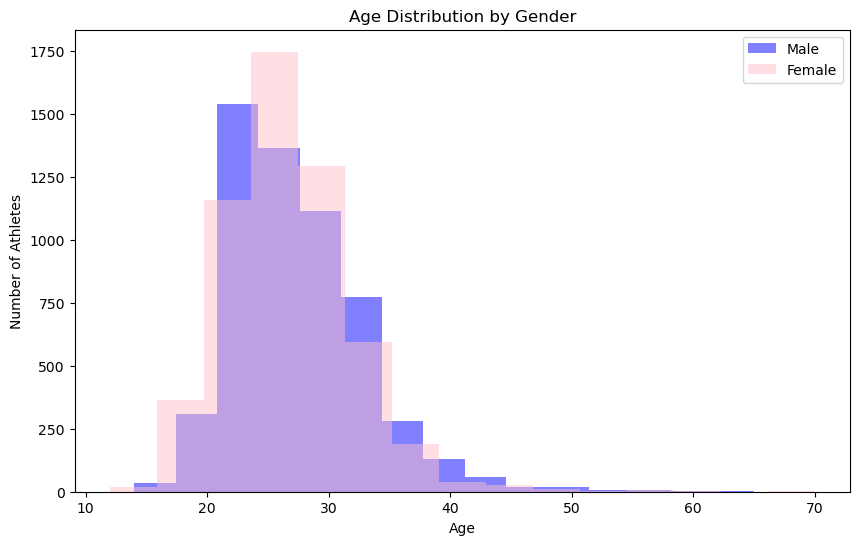

In [10]:
import matplotlib.pyplot as plt
import datetime as dt

# Convert 'birth_date' to datetime
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Calculate the current year
current_year = dt.datetime.now().year

# Calculate the age of the athletes
df['age'] = current_year - df['birth_date'].dt.year

# Remove rows with missing or invalid age values
df = df[df['age'].notna()]

# Plot the age distribution for male and female athletes
plt.figure(figsize=(10, 6))
df[df['gender'] == 'Male']['age'].plot(kind='hist', alpha=0.5, label='Male', bins=15, color='blue')
df[df['gender'] == 'Female']['age'].plot(kind='hist', alpha=0.5, label='Female', bins=15, color='pink')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.title('Age Distribution by Gender')
plt.legend()

# Show the plot
plt.show()


In [12]:
# Count of male and female athletes by country
country_gender_counts = df.groupby(['country', 'gender']).size().unstack(fill_value=0)

# Calculate total athletes and gender percentage
country_gender_counts['Total'] = country_gender_counts['Male'] + country_gender_counts['Female']
country_gender_counts['Male_Percentage'] = (country_gender_counts['Male'] / country_gender_counts['Total']) * 100
country_gender_counts['Female_Percentage'] = (country_gender_counts['Female'] / country_gender_counts['Total']) * 100

# Display the first few rows
print(country_gender_counts.head(20))


gender               Female  Male  Total  Male_Percentage  Female_Percentage
country                                                                     
AIN                      17    15     32        46.875000          53.125000
Afghanistan               3     3      6        50.000000          50.000000
Albania                   3     5      8        62.500000          37.500000
Algeria                  19    27     46        58.695652          41.304348
American Samoa            1     1      2        50.000000          50.000000
Andorra                   1     1      2        50.000000          50.000000
Angola                   17     8     25        32.000000          68.000000
Antigua and Barbuda       2     3      5        60.000000          40.000000
Argentina                33   110    143        76.923077          23.076923
Armenia                   2    13     15        86.666667          13.333333
Aruba                     2     4      6        66.666667          33.333333

In [14]:
# Calculate the average age of male and female athletes
average_age_by_gender = df.groupby('gender')['age'].mean()

# Display the results
print(average_age_by_gender)



gender
Female    26.600183
Male      27.321132
Name: age, dtype: float64


In [16]:
# Re-importing the necessary libraries after the file re-upload
import pandas as pd

# Reloading the newly uploaded file to continue the analysis
athletes_df = pd.read_csv(file_path)

# Count the frequency of disciplines and events
discipline_counts = athletes_df['disciplines'].value_counts()
event_counts = athletes_df['events'].value_counts()

# Display the top 10 most common disciplines and events
top_disciplines = discipline_counts.head(10)
top_events = event_counts.head(10)

top_disciplines, top_events


(disciplines
 ['Athletics']       2018
 ['Swimming']         836
 ['Football']         553
 ['Rowing']           493
 ['Hockey']           415
 ['Handball']         386
 ['Judo']             378
 ['Shooting']         342
 ['Sailing']          330
 ['Rugby Sevens']     317
 Name: count, dtype: int64,
 events
 ['Men']                   1478
 ['Women']                 1385
 ["Men's Individual"]       103
 ["Women's Individual"]     102
 ["Men's Singles"]           94
 ["Women's Singles"]         94
 ["Women's Marathon"]        90
 ["Men's Marathon"]          82
 ['Group All-Around']        70
 ["Men's 100m"]              66
 Name: count, dtype: int64)

C:\Users\agaje\AppData\Local\Temp\ipykernel_2208\3909070726.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discipline_counts.values, y=discipline_counts.index, ax=axs[0], palette="Blues_d")
C:\Users\agaje\AppData\Local\Temp\ipykernel_2208\3909070726.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.values, y=event_counts.index, ax=axs[1], palette="Greens_d")


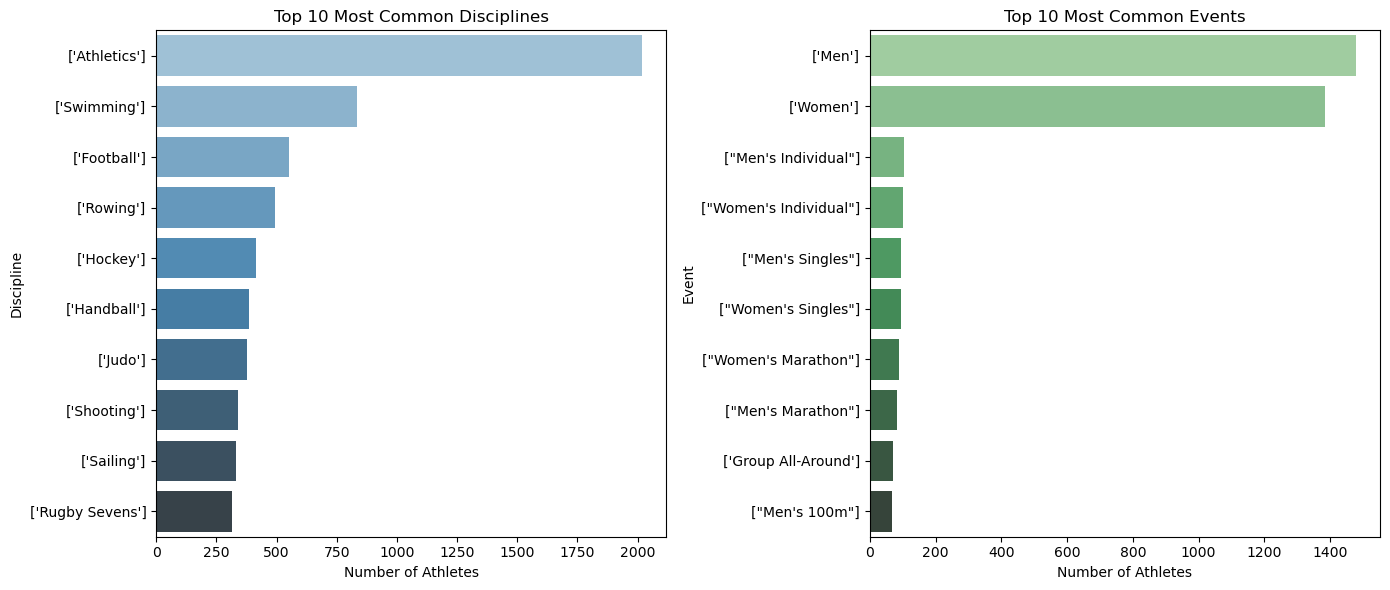

In [18]:

import seaborn as sns
# Re-running the same code for visualizing the most common disciplines and events
discipline_counts = df['disciplines'].value_counts().head(10)
event_counts = df['events'].value_counts().head(10)

# Set up the figure and axis for the plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for disciplines
sns.barplot(x=discipline_counts.values, y=discipline_counts.index, ax=axs[0], palette="Blues_d")
axs[0].set_title('Top 10 Most Common Disciplines')
axs[0].set_xlabel('Number of Athletes')
axs[0].set_ylabel('Discipline')

# Plot for events
sns.barplot(x=event_counts.values, y=event_counts.index, ax=axs[1], palette="Greens_d")
axs[1].set_title('Top 10 Most Common Events')
axs[1].set_xlabel('Number of Athletes')
axs[1].set_ylabel('Event')

# Improve layout and display the plots
plt.tight_layout()
plt.show()


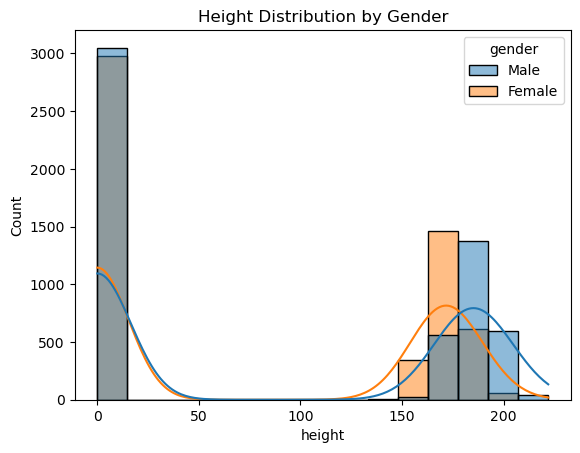

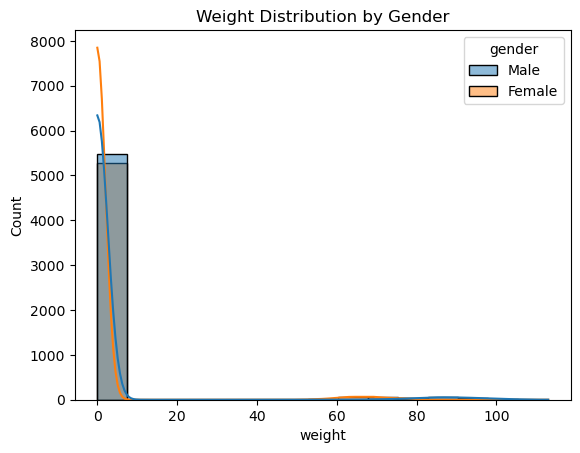

In [20]:
import seaborn as sns
sns.histplot(data=df, x='height', hue='gender', kde=True)
plt.title('Height Distribution by Gender')
plt.show()

sns.histplot(data=df, x='weight', hue='gender', kde=True)
plt.title('Weight Distribution by Gender')
plt.show()


In [22]:
top_countries = df['country'].value_counts().head(20)
print("Top 5 Countries with the Highest Athlete Participation:")
print(top_countries)


Top 5 Countries with the Highest Athlete Participation:
country
United States    619
France           600
Australia        475
Germany          457
Japan            431
Spain            401
China            398
Italy            397
Great Britain    342
Canada           332
Brazil           290
Netherlands      289
Poland           226
New Zealand      208
Hungary          177
Belgium          177
Egypt            157
Korea            147
Argentina        143
Ireland          143
Name: count, dtype: int64


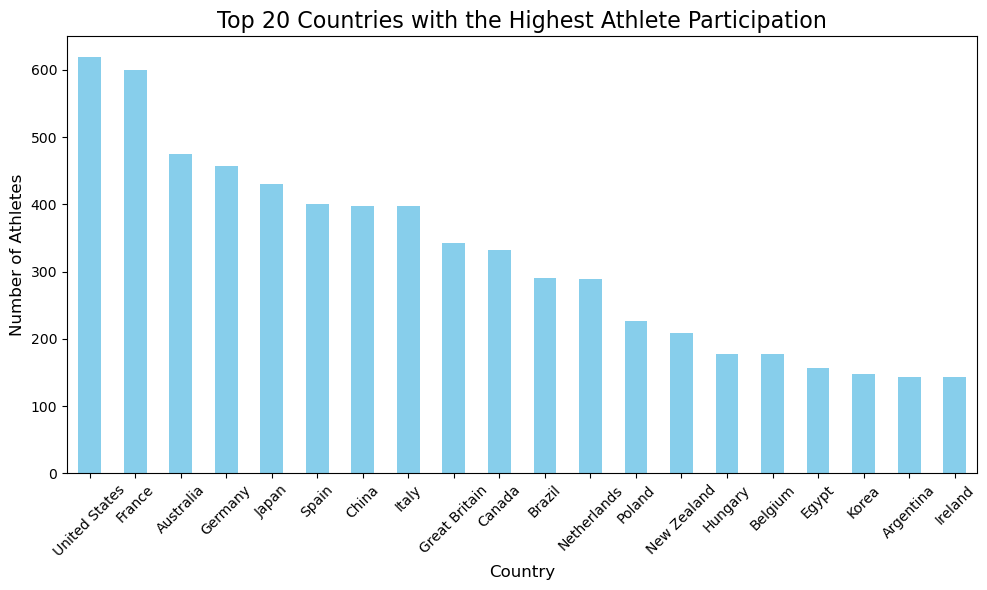

In [24]:
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(10, 6))

# Bar chart for top 20 countries with the highest athlete participation
top_countries.plot(kind='bar', color='skyblue')

# Title and labels
plt.title('Top 20 Countries with the Highest Athlete Participation', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [26]:
country_with_highest_female_percentage = country_gender_counts['Female_Percentage'].idxmax()
highest_female_percentage = country_gender_counts['Female_Percentage'].max()
print(f"Country with Highest Female Participation: {country_with_highest_female_percentage} ({highest_female_percentage:.2f}%)")


Country with Highest Female Participation: Solomon Islands (100.00%)


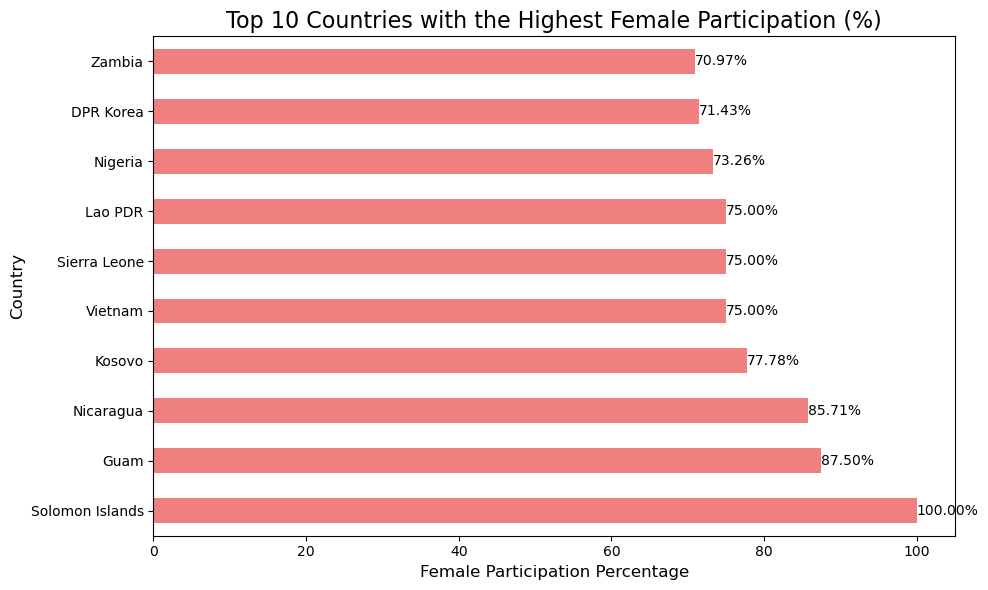

In [28]:
import matplotlib.pyplot as plt

# Sort countries by female participation percentage
top_female_percentage_countries = country_gender_counts.sort_values(by='Female_Percentage', ascending=False).head(10)

# Plot settings
plt.figure(figsize=(10, 6))

# Horizontal bar chart for top countries with highest female participation
top_female_percentage_countries['Female_Percentage'].plot(kind='barh', color='lightcoral')

# Title and labels
plt.title('Top 10 Countries with the Highest Female Participation (%)', fontsize=16)
plt.xlabel('Female Participation Percentage', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Display the percentage values on the bars
for index, value in enumerate(top_female_percentage_countries['Female_Percentage']):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
SCHEDULES

In [36]:
import pandas as pd
df1 = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\schedules.csv")
df1.head()

,start_date,end_date,day,status,discipline,discipline_code,event,event_medal,phase,gender,event_type,venue,venue_code,location_description,location_code,url
0,2024-07-24T15:00:00+02:00,2024-07-24T16:45:00+02:00,2024-07-24,FINISHED,Football,FBL,Men,0,Men's Group B,M,HTEAM,Geoffroy-Guichard Stadium,STE,"Geoffroy-Guichard Stadium, Saint-Etienne",STE,/en/paris-2024/results/football/men/gpb-000100--
1,2024-07-24T15:00:00+02:00,2024-07-24T16:45:00+02:00,2024-07-24,FINISHED,Football,FBL,Men,0,Men's Group C,M,HTEAM,Parc des Princes,PDP,"Parc des Princes, Paris",PDP,/en/paris-2024/results/football/men/gpc-000100--
2,2024-07-24T15:30:00+02:00,2024-07-24T15:46:00+02:00,2024-07-24,FINISHED,Rugby Sevens,RU7,Men,0,Men's Pool B,M,HTEAM,Stade de France,STA,Stade de France,STA,/en/paris-2024/results/rugby-sevens/men/gpb-00...
3,2024-07-24T16:00:00+02:00,2024-07-24T16:16:00+02:00,2024-07-24,FINISHED,Rugby Sevens,RU7,Men,0,Men's Pool B,M,HTEAM,Stade de France,STA,Stade de France,STA,/en/paris-2024/results/rugby-sevens/men/gpb-00...
4,2024-07-24T16:30:00+02:00,2024-07-24T16:46:00+02:00,2024-07-24,FINISHED,Rugby Sevens,RU7,Men,0,Men's Pool C,M,HTEAM,Stade de France,STA,Stade de France,STA,/en/paris-2024/results/rugby-sevens/men/gpc-00...


In [38]:
df=df1
print(df)

                     start_date                   end_date         day  \
0     2024-07-24T15:00:00+02:00  2024-07-24T16:45:00+02:00  2024-07-24   
1     2024-07-24T15:00:00+02:00  2024-07-24T16:45:00+02:00  2024-07-24   
2     2024-07-24T15:30:00+02:00  2024-07-24T15:46:00+02:00  2024-07-24   
3     2024-07-24T16:00:00+02:00  2024-07-24T16:16:00+02:00  2024-07-24   
4     2024-07-24T16:30:00+02:00  2024-07-24T16:46:00+02:00  2024-07-24   
...                         ...                        ...         ...   
3890  2024-08-11T13:44:00+02:00  2024-08-11T13:44:00+02:00  2024-08-11   
3891  2024-08-11T13:56:00+02:00  2024-08-11T14:28:00+02:00  2024-08-11   
3892  2024-08-11T14:00:00+02:00  2024-08-11T15:25:00+02:00  2024-08-11   
3893  2024-08-11T15:30:00+02:00  2024-08-11T17:15:00+02:00  2024-08-11   
3894  2024-08-11T21:00:00+02:00                        NaN  2024-08-11   

         status        discipline discipline_code           event  \
0      FINISHED          Football         

In [42]:
df.shape

(3895, 16)

In [44]:
df.tail()

,start_date,end_date,day,status,discipline,discipline_code,event,event_medal,phase,gender,event_type,venue,venue_code,location_description,location_code,url
3890,2024-08-11T13:44:00+02:00,2024-08-11T13:44:00+02:00,2024-08-11,CANCELLED,Cycling Track,CTR,Women's Sprint,0,"Women's Sprint, Finals",W,ATH,National Velodrome,VE1,Saint-Quentin-en-Yvelines Velodrome,VE1,NaN
3891,2024-08-11T13:56:00+02:00,2024-08-11T14:28:00+02:00,2024-08-11,FINISHED,Cycling Track,CTR,Women's Omnium,1,"Women's Omnium, Points Race 4/4",W,ATH,National Velodrome,VE1,Saint-Quentin-en-Yvelines Velodrome,VE1,/en/paris-2024/results/cycling-track/women-s-o...
3892,2024-08-11T14:00:00+02:00,2024-08-11T15:25:00+02:00,2024-08-11,FINISHED,Water Polo,WPO,Men,1,Men's Finals,M,HTEAM,Paris La Defense Arena,DEF,Paris La Defense Arena,DEF,/en/paris-2024/results/water-polo/men/fnl-0001...
3893,2024-08-11T15:30:00+02:00,2024-08-11T17:15:00+02:00,2024-08-11,FINISHED,Basketball,BKB,Women,1,Women's Finals,W,HTEAM,Bercy Arena,BCY,Bercy Arena,BCY,/en/paris-2024/results/basketball/women/fnl-00...
3894,2024-08-11T21:00:00+02:00,NaN,2024-08-11,SCHEDULED,Closing Ceremony,CER,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/en/news/jo-paris-2024-ceremonie-cloture-stade...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   start_date            3895 non-null   object
 1   end_date              3893 non-null   object
 2   day                   3895 non-null   object
 3   status                3895 non-null   object
 4   discipline            3895 non-null   object
 5   discipline_code       3895 non-null   object
 6   event                 3893 non-null   object
 7   event_medal           3895 non-null   int64 
 8   phase                 3893 non-null   object
 9   gender                3893 non-null   object
 10  event_type            3893 non-null   object
 11  venue                 3893 non-null   object
 12  venue_code            3893 non-null   object
 13  location_description  3893 non-null   object
 14  location_code         3893 non-null   object
 15  url                   3810 non-null   

In [48]:
df.isnull().sum()

start_date               0
end_date                 2
day                      0
status                   0
discipline               0
discipline_code          0
event                    2
event_medal              0
phase                    2
gender                   2
event_type               2
venue                    2
venue_code               2
location_description     2
location_code            2
url                     85
dtype: int64

In [50]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Find rows where 'gender' column has missing values
missing_gender_rows = df[df['gender'].isna()]

# Display the rows with missing 'gender' values
print(missing_gender_rows)

                     start_date end_date         day     status  \
49    2024-07-26T20:00:00+02:00      NaN  2024-07-26   FINISHED   
3894  2024-08-11T21:00:00+02:00      NaN  2024-08-11  SCHEDULED   

            discipline discipline_code event  event_medal phase gender  \
49    Opening Ceremony             CER   NaN            0   NaN    NaN   
3894  Closing Ceremony             CER   NaN            0   NaN    NaN   

     event_type venue venue_code location_description location_code  \
49          NaN   NaN        NaN                  NaN           NaN   
3894        NaN   NaN        NaN                  NaN           NaN   

                                                    url  
49    /en/paris-2024/the-games/ceremonies/opening-ce...  
3894  /en/news/jo-paris-2024-ceremonie-cloture-stade...  


In [52]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Find rows where 'gender' column has missing values
missing_gender_rows = df[df['venue'].isna()]

# Display the rows with missing 'gender' values
print(missing_gender_rows)

                     start_date end_date         day     status  \
49    2024-07-26T20:00:00+02:00      NaN  2024-07-26   FINISHED   
3894  2024-08-11T21:00:00+02:00      NaN  2024-08-11  SCHEDULED   

            discipline discipline_code event  event_medal phase gender  \
49    Opening Ceremony             CER   NaN            0   NaN    NaN   
3894  Closing Ceremony             CER   NaN            0   NaN    NaN   

     event_type venue venue_code location_description location_code  \
49          NaN   NaN        NaN                  NaN           NaN   
3894        NaN   NaN        NaN                  NaN           NaN   

                                                    url  
49    /en/paris-2024/the-games/ceremonies/opening-ce...  
3894  /en/news/jo-paris-2024-ceremonie-cloture-stade...  


In [54]:
df.describe()

,event_medal
count,3895.000000
mean,0.213864
std,0.653475
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


In [58]:
df.dtypes

start_date              object
end_date                object
day                     object
status                  object
discipline              object
discipline_code         object
event                   object
event_medal              int64
phase                   object
gender                  object
event_type              object
venue                   object
venue_code              object
location_description    object
location_code           object
url                     object
dtype: object

In [60]:
numerical=df.select_dtypes(include=['int64','float64']).columns #df.select used to select 
print("numerical features are",numerical.tolist())
categor=df.select_dtypes(include=['category','object','bool']).columns  
print("categorical features are",categor.tolist())

numerical features are ['event_medal']
categorical features are ['start_date', 'end_date', 'day', 'status', 'discipline', 'discipline_code', 'event', 'phase', 'gender', 'event_type', 'venue', 'venue_code', 'location_description', 'location_code', 'url']


In [62]:
df['venue'].value_counts()

venue
Champ-de-Mars Arena          786
Grand Palais                 442
Roland-Garros Stadium        235
La Chapelle Arena            212
North Paris Arena            210
Stade de France              202
Marseille Marina             186
South Paris Arena 4          182
Invalides                    172
Nautical St - Flat water     149
La Concorde 1                133
Paris La Defense Arena       121
Eiffel Tower Stadium         108
National Velodrome            80
Yves-du-Manoir Stadium        76
South Paris Arena 6           70
Aquatics Centre               65
Teahupo'o, Tahiti             64
Chateauroux Shooting Ctr      54
Pierre Mauroy Stadium         52
South Paris Arena 1           52
Château de Versailles         42
Bercy Arena                   42
Nautical St - White water     32
Le Bourget Climbing Venue     18
BMX Stadium                   16
Lyon Stadium                  11
Parc des Princes              10
Marseille Stadium             10
La Beaujoire Stadium           8
Le G

In [64]:
#######################
df.nunique()
df['start_date'].unique()

array(['2024-07-24T15:00:00+02:00', '2024-07-24T15:30:00+02:00',
       '2024-07-24T16:00:00+02:00', ..., '2024-08-11T14:00:00+02:00',
       '2024-08-11T15:30:00+02:00', '2024-08-11T21:00:00+02:00'],
      dtype=object)

In [66]:
df['location_code'].value_counts()

location_code
JU1    276
NPA    210
WRB    177
INV    172
JU2    166
      ... 
GA3      1
GA7      1
GA4      1
GA8      1
GA6      1
Name: count, Length: 91, dtype: int64

In [68]:
df['gender'].value_counts()

gender
M    1940
W    1791
X     141
O      21
Name: count, dtype: int64

In [70]:
df['discipline'].value_counts()

discipline
Judo                     442
Wrestling                344
Fencing                  284
Boxing                   235
Tennis                   208
Badminton                206
Sailing                  186
Table Tennis             182
Archery                  170
Taekwondo                158
Athletics                139
Beach Volleyball         108
Swimming                  91
Rowing                    90
Cycling Track             80
Handball                  76
Hockey                    76
Water Polo                74
Rugby Sevens              68
3x3 Basketball            68
Breaking                  65
Surfing                   64
Canoe Sprint              59
Football                  58
Shooting                  54
Basketball                52
Volleyball                52
Canoe Slalom              32
Modern Pentathlon         26
Artistic Gymnastics       22
Equestrian                18
Sport Climbing            18
Cycling BMX Racing        16
Diving                    16
Wei

In [72]:
df.memory_usage(deep=True)



Index                      132
start_date              288230
end_date                288146
day                     229805
status                  222086
discipline              223664
discipline_code         202540
event                   244070
event_medal              31160
phase                   298390
gender                  194714
event_type              206712
venue                   259149
venue_code              202500
location_description    285306
location_code           202500
url                     413620
dtype: int64

In [74]:
pip install pandas matplotlib seaborn


C:\Users\agaje\AppData\Local\Temp\ipykernel_2208\2065529811.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='event', y='discipline', data=event_distribution, palette='viridis')


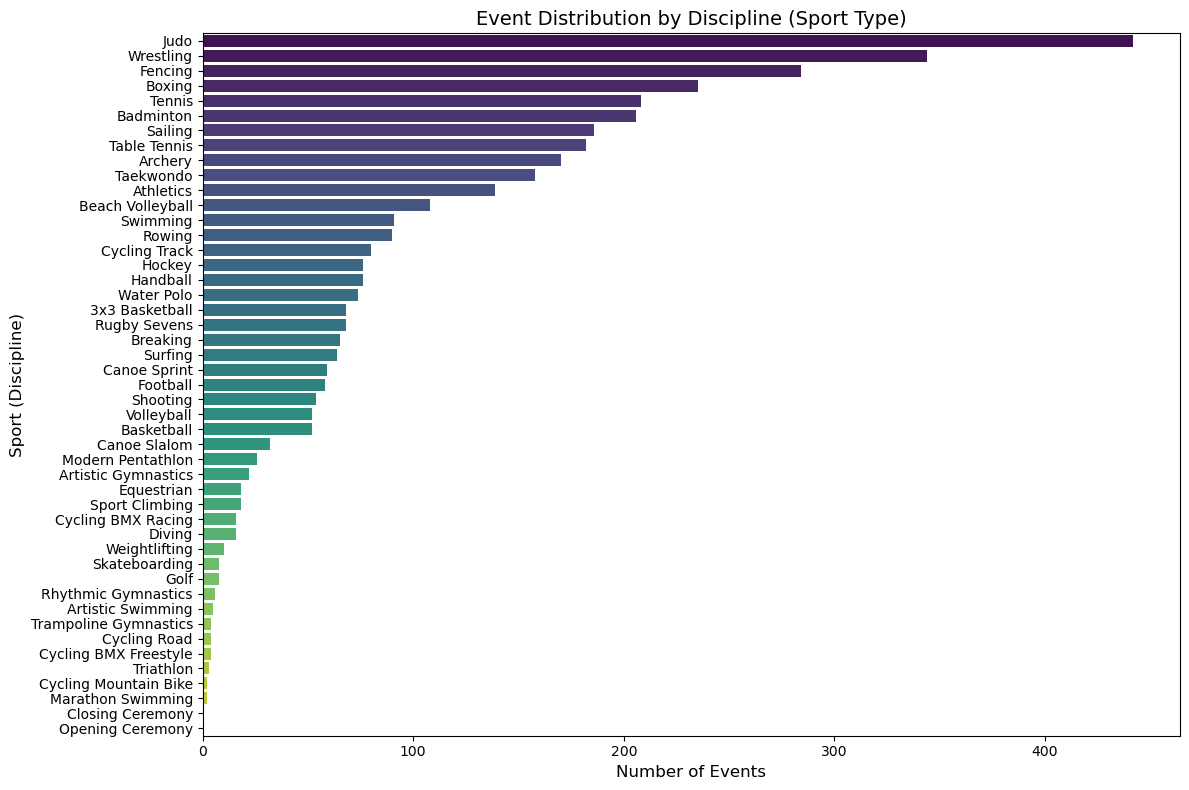

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by discipline to count the number of events per sport
event_distribution = df.groupby(['discipline', 'discipline_code'])['event'].count().reset_index()

# Sort the event count for better visualization
event_distribution = event_distribution.sort_values(by='event', ascending=False)

# Bar Chart
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
sns.barplot(x='event', y='discipline', data=event_distribution, palette='viridis')

plt.title('Event Distribution by Discipline (Sport Type)', fontsize=14)  # Larger title font
plt.xlabel('Number of Events', fontsize=12)  # Label for x-axis
plt.ylabel('Sport (Discipline)', fontsize=12)  # Label for y-axis
plt.xticks(fontsize=10)  # Font size for x-ticks
plt.yticks(fontsize=10, rotation=0)  # Font size and rotation for y-ticks

plt.tight_layout()  # Adjust the layout to make everything fit
plt.show()



<Figure size 1200x800 with 0 Axes>

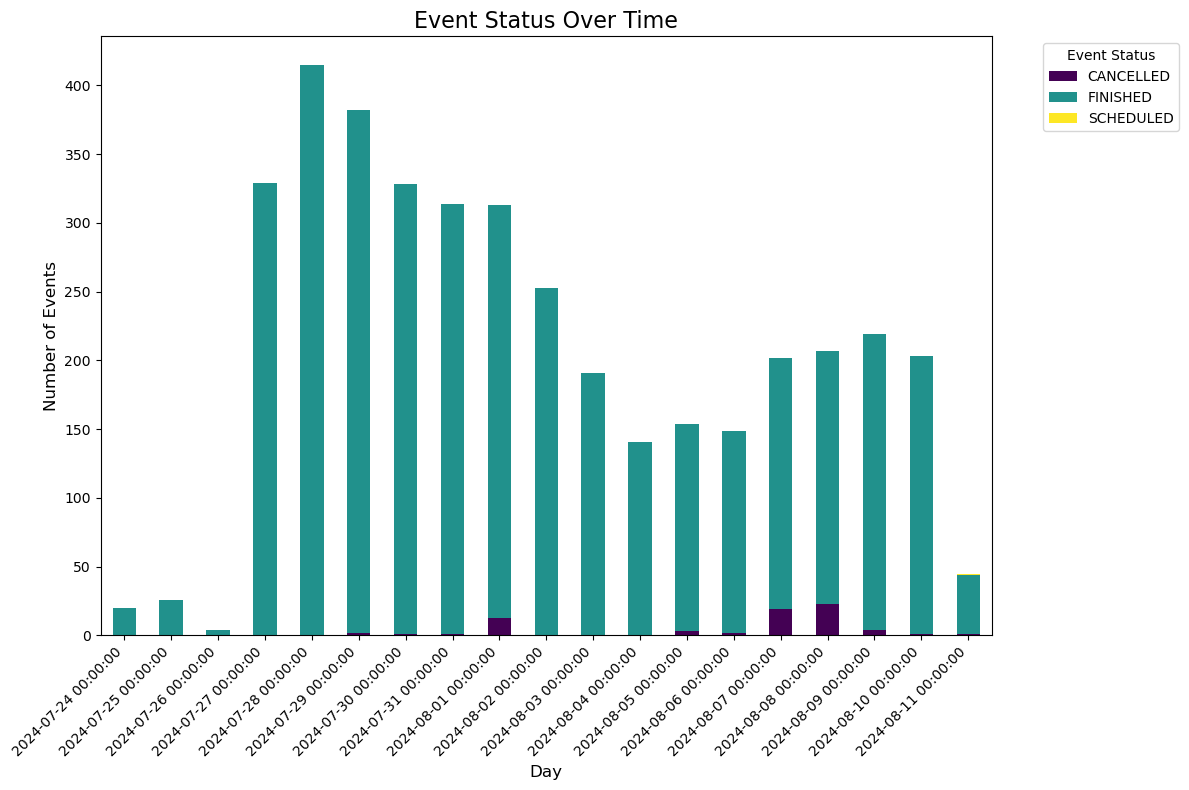

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'day' column to datetime if it's not already in datetime format
df['day'] = pd.to_datetime(df['day'])

# Group by day and status, and count the number of events
event_status_over_time = df.groupby(['day', 'status']).size().unstack(fill_value=0)

# Time Series Plot (Stacked Bar Chart)
plt.figure(figsize=(12, 8))
event_status_over_time.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Event Status Over Time', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Event Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


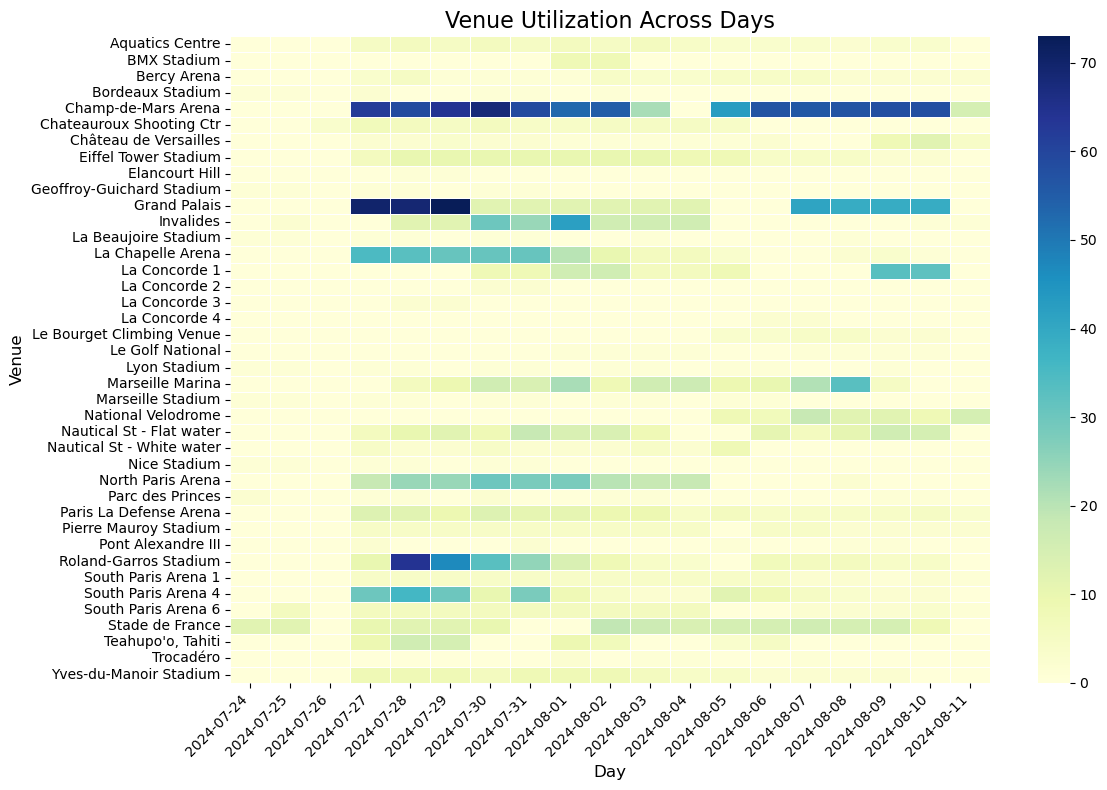

In [80]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Extract the day from the start_date (assuming daily granularity)
df['day'] = df['start_date'].dt.date

# Group by venue and day to count how many events are held in each venue per day
venue_utilization = df.groupby(['venue', 'day']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(venue_utilization, cmap='YlGnBu', linewidths=0.5)

# Title and labels
plt.title('Venue Utilization Across Days', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Venue', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

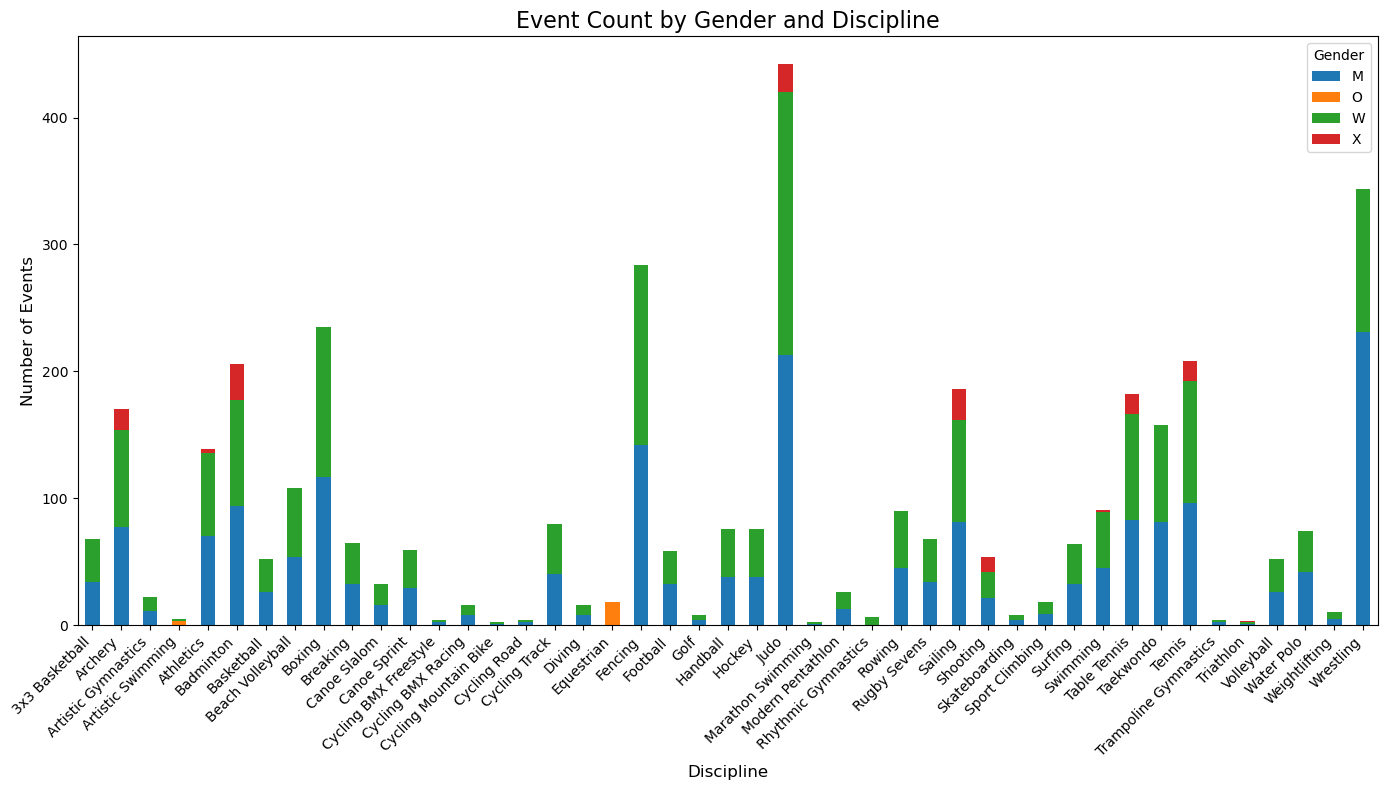

In [82]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by gender and discipline to count events
event_count_gender = df.groupby(['discipline', 'gender'])['event'].count().unstack()

# Define a color palette for 4 genders
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red

# Plotting a stacked bar chart with 4 genders
plt.figure(figsize=(14, 8))  # Increase the figure size
event_count_gender.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

# Adjust the x-axis labels
plt.title('Event Count by Gender and Discipline', fontsize=16)
plt.xlabel('Discipline', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and align them to the right
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()  # Ensure that everything fits into the plot neatly
plt.show()


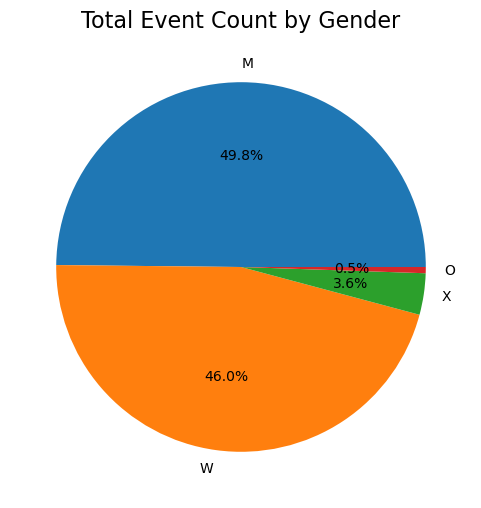

In [84]:
# $ Count total events for each gender
gender_event_count = df['gender'].value_counts()

# Plotting a pie chart
gender_event_count.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], figsize=(6, 6))
plt.title('Total Event Count by Gender', fontsize=16)
plt.ylabel('')  # Hides the y-axis label
plt.show()


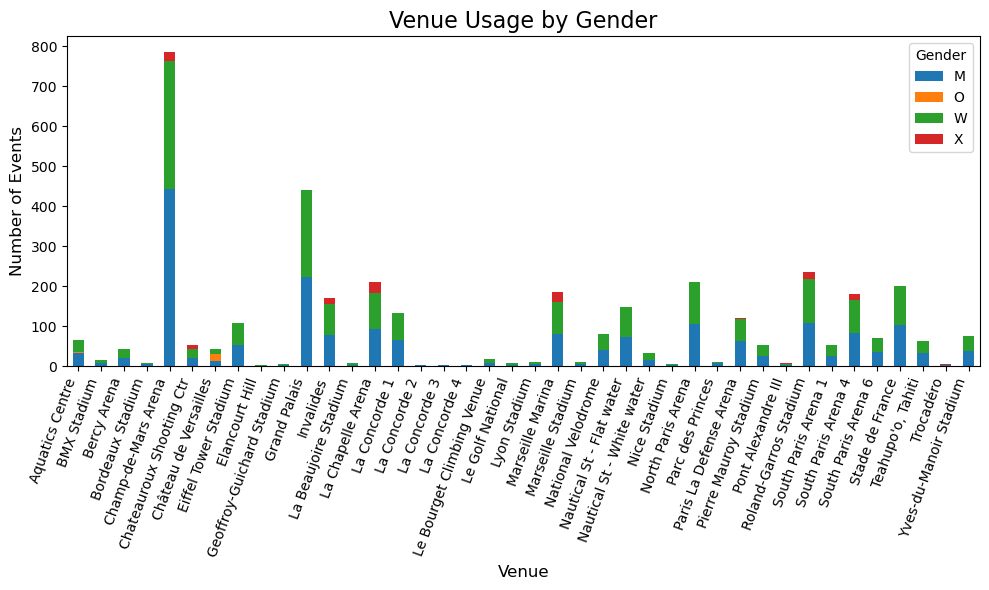

In [86]:
# Group by venue and gender to count events 
venue_usage_gender = df.groupby(['venue', 'gender'])['event'].count().unstack().fillna(0)

# Plotting a stacked bar chart
venue_usage_gender.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])  # Added more colors
plt.title('Venue Usage by Gender', fontsize=16)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)

# Rotating labels and aligning them to prevent overlap
plt.xticks(rotation=70, ha='right')

plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()


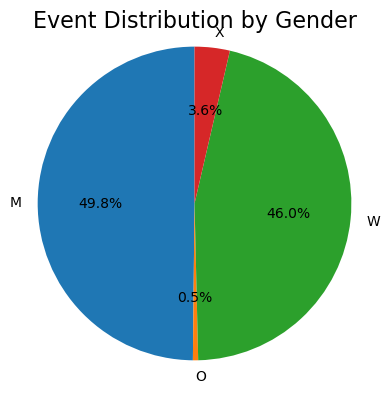

In [88]:
# Group by gender and sum the number of events
gender_distribution = df.groupby('gender')['event'].count()

# Plotting a pie chart for gender distribution
plt.figure(figsize=(4, 4))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Event Distribution by Gender', fontsize=16)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.tight_layout()
plt.show()


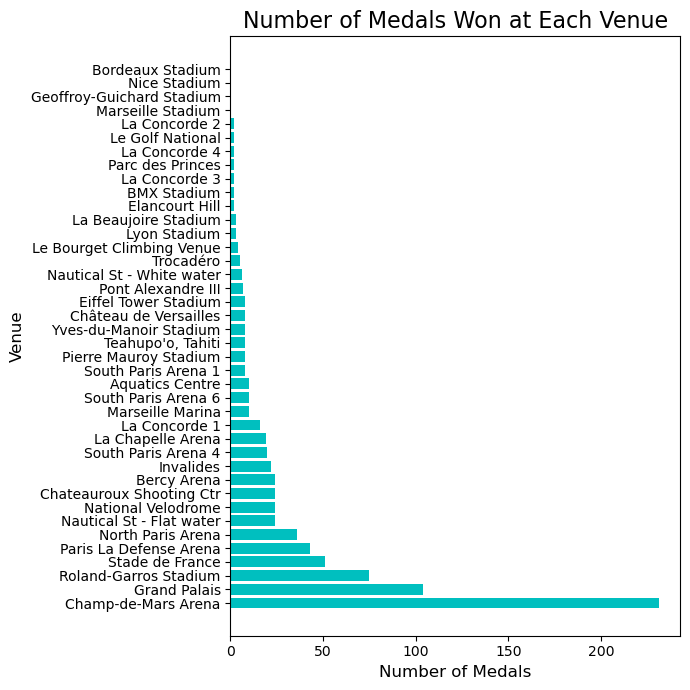

In [90]:
#medals won at each venue
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset already contains a column 'event_medal' 
# where 1 represents a medal being awarded and 0 represents no medal.

# Group by venue and sum the medals won at each venue
medals_by_venue = df.groupby('venue')['event_medal'].sum().reset_index()

# Sort the venues by the number of medals
medals_by_venue = medals_by_venue.sort_values(by='event_medal', ascending=False)

# Plotting the bar chart for medals won at each venue
plt.figure(figsize=(7, 7))
plt.barh(medals_by_venue['venue'], medals_by_venue['event_medal'], color='c')

# Adding labels and title
plt.xlabel('Number of Medals', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.title('Number of Medals Won at Each Venue', fontsize=16)

# Rotate venue names on the y-axis for better readability
plt.tight_layout()
plt.show()


In [ ]:
MEDALS

In [92]:

import pandas as pd
df2 = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medals.csv")
print("C:\\Users\\agaje\\Desktop\\EDA\\medals.csv",df2.head(50))


C:\Users\agaje\Desktop\EDA\medals.csv       medal_type  medal_code  medal_date                    name gender  \
0     Gold Medal         1.0  2024-07-27         Remco EVENEPOEL      M   
1   Silver Medal         2.0  2024-07-27           Filippo GANNA      M   
2   Bronze Medal         3.0  2024-07-27           Wout van AERT      M   
3     Gold Medal         1.0  2024-07-27             Grace BROWN      W   
4   Silver Medal         2.0  2024-07-27          Anna HENDERSON      W   
5   Bronze Medal         3.0  2024-07-27            Chloe DYGERT      W   
6     Gold Medal         1.0  2024-07-27                   China      W   
7   Silver Medal         2.0  2024-07-27           United States      W   
8   Bronze Medal         3.0  2024-07-27           Great Britain      W   
9     Gold Medal         1.0  2024-07-27               OH Sanguk      M   
10  Silver Medal         2.0  2024-07-27           Fares FERJANI      M   
11  Bronze Medal         3.0  2024-07-27            Luigi SAME

In [94]:
df=df2
print(df)

        medal_type  medal_code  medal_date                       name gender  \
0       Gold Medal         1.0  2024-07-27            Remco EVENEPOEL      M   
1     Silver Medal         2.0  2024-07-27              Filippo GANNA      M   
2     Bronze Medal         3.0  2024-07-27              Wout van AERT      M   
3       Gold Medal         1.0  2024-07-27                Grace BROWN      W   
4     Silver Medal         2.0  2024-07-27             Anna HENDERSON      W   
...            ...         ...         ...                        ...    ...   
1039  Silver Medal         2.0  2024-08-09             KALEYN Boryana      W   
1040  Bronze Medal         3.0  2024-08-09             RAFFAELI Sofia      W   
1041    Gold Medal         1.0  2024-08-09           THIAM Nafissatou      W   
1042  Silver Medal         2.0  2024-08-09  JOHNSON-THOMPSON Katarina      W   
1043  Bronze Medal         3.0  2024-08-09                 VIDTS Noor      W   

               discipline              

Overall standard deviation of medal counts across disciplines: 28.08


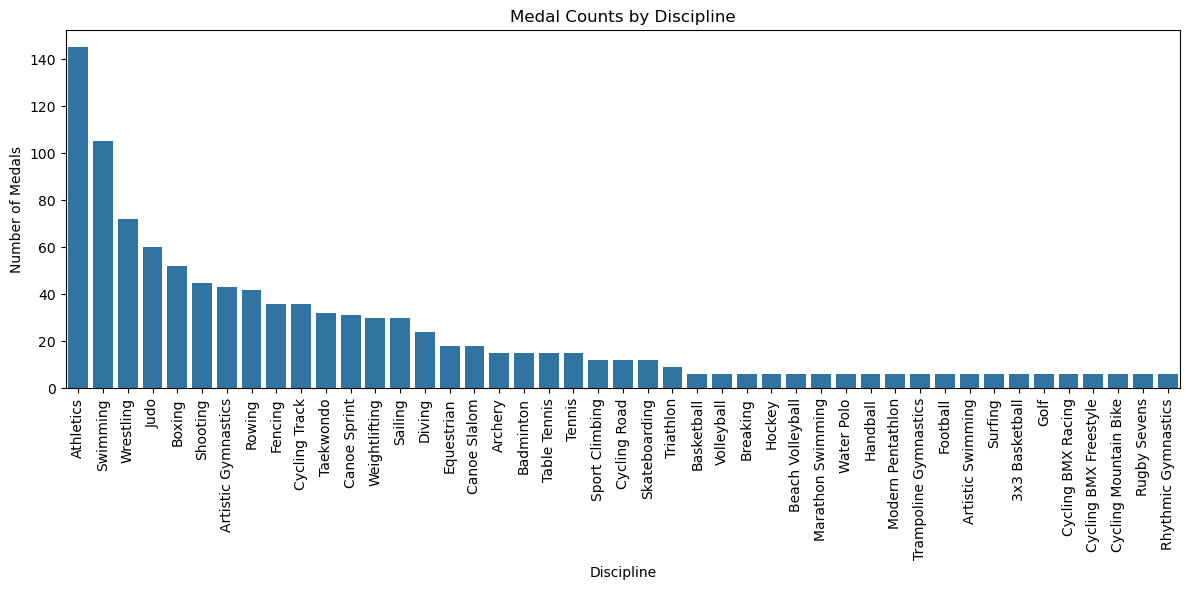

Top 5 disciplines by medal count:
discipline
Athletics    145
Swimming     105
Wrestling     72
Judo          60
Boxing        52
Name: count, dtype: int64
Bottom 5 disciplines by medal count:
discipline
Cycling BMX Racing       6
Cycling BMX Freestyle    6
Cycling Mountain Bike    6
Rugby Sevens             6
Rhythmic Gymnastics      6
Name: count, dtype: int64


In [96]:
#How does the variability in medal counts (standard deviation) compare between different sports or events?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the standard deviation of medal counts for each discipline
discipline_std = df.groupby('discipline')['medal_type'].count().std()
print(f"Overall standard deviation of medal counts across disciplines: {discipline_std:.2f}")

# Calculate medal counts for each discipline
discipline_counts = df['discipline'].value_counts()

# Calculate the standard deviation for each discipline
discipline_std = df.groupby('discipline')['medal_type'].count().std()

# Create a bar plot for the medal counts by discipline
plt.figure(figsize=(12, 6))
sns.barplot(x=discipline_counts.index, y=discipline_counts.values)
plt.title('Medal Counts by Discipline')
plt.xlabel('Discipline')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\
Top 5 disciplines by medal count:")
print(discipline_counts.head())

print("\
Bottom 5 disciplines by medal count:")
print(discipline_counts.tail())

Mean number of medals per country: 11.35
Median number of medals per country: 5.00


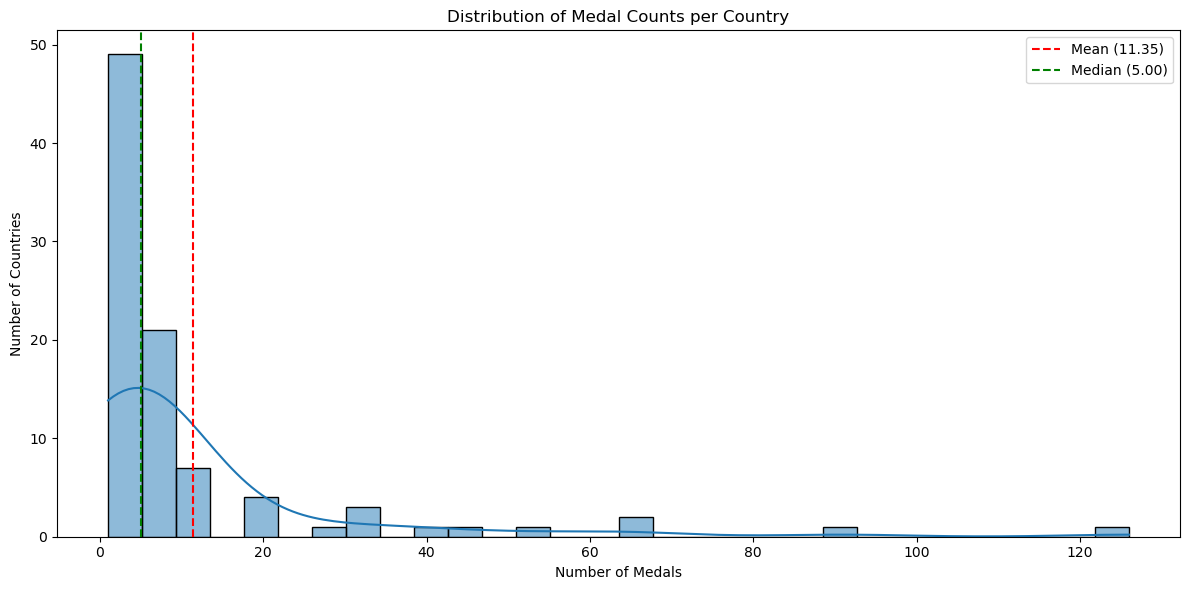

Top 10 countries by medal count:
country
United States    126
China             91
Great Britain     65
France            64
Australia         53
Japan             45
Italy             40
Netherlands       34
Germany           33
Korea             32
Name: count, dtype: int64
Bottom 10 countries by medal count:
country
Singapore     1
Jordan        1
Pakistan      1
Peru          1
Cyprus        1
Zambia        1
Cabo Verde    1
Slovakia      1
Fiji          1
Dominica      1
Name: count, dtype: int64


In [98]:
#What is the mean and median number of medals won per country in the most recent Olympics?

# Count medals by country
medal_counts = df['country'].value_counts()

# Calculate mean and median
mean_medals = medal_counts.mean()
median_medals = medal_counts.median()

print(f"Mean number of medals per country: {mean_medals:.2f}")
print(f"Median number of medals per country: {median_medals:.2f}")

# Create a histogram
plt.figure(figsize=(12, 6))
sns.histplot(medal_counts, kde=True, bins=30)
plt.axvline(mean_medals, color='r', linestyle='--', label=f'Mean ({mean_medals:.2f})')
plt.axvline(median_medals, color='g', linestyle='--', label=f'Median ({median_medals:.2f})')
plt.title('Distribution of Medal Counts per Country')
plt.xlabel('Number of Medals')
plt.ylabel('Number of Countries')
plt.legend()
plt.tight_layout()
plt.show()

# Display top 10 and bottom 10 countries by medal count
print("\
Top 10 countries by medal count:")
print(medal_counts.head(10))
print("\
Bottom 10 countries by medal count:")
print(medal_counts.tail(10))

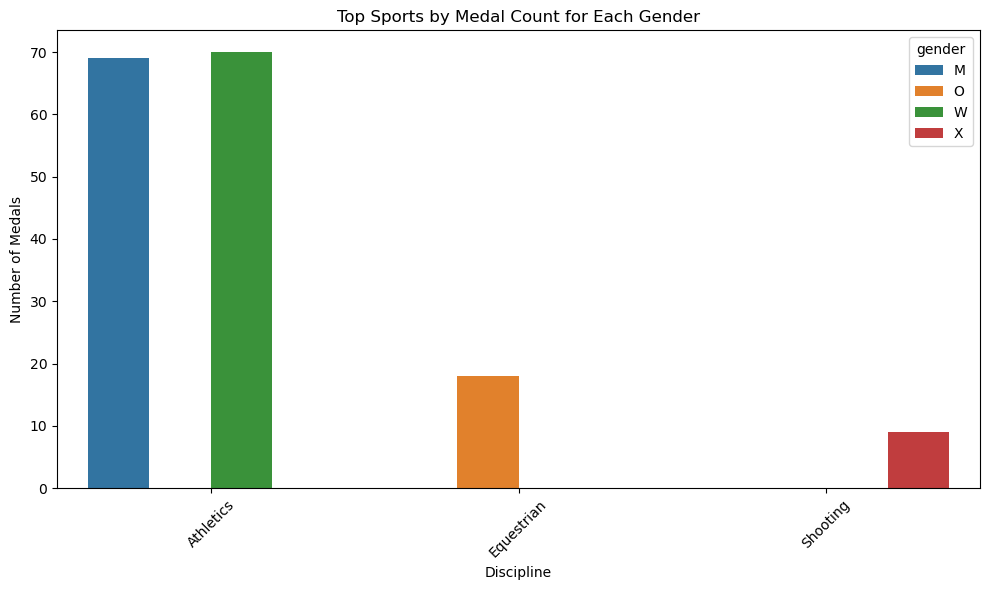

    discipline gender  medal_type
9    Athletics      M          69
39  Equestrian      O          18
10   Athletics      W          70
67    Shooting      X           9


In [100]:
#Which sports had the highest medal counts for each gender?

# Group by discipline and gender, then count medals
medals_by_gender = df.groupby(['discipline', 'gender'])['medal_type'].count().reset_index()

# Find the top sport for each gender
max_medals_by_gender = medals_by_gender.loc[medals_by_gender.groupby('gender')['medal_type'].idxmax()]

# Create a bar plot for the top sports by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=max_medals_by_gender, x='discipline', y='medal_type', hue='gender')
plt.title('Top Sports by Medal Count for Each Gender')
plt.xlabel('Discipline')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(max_medals_by_gender)

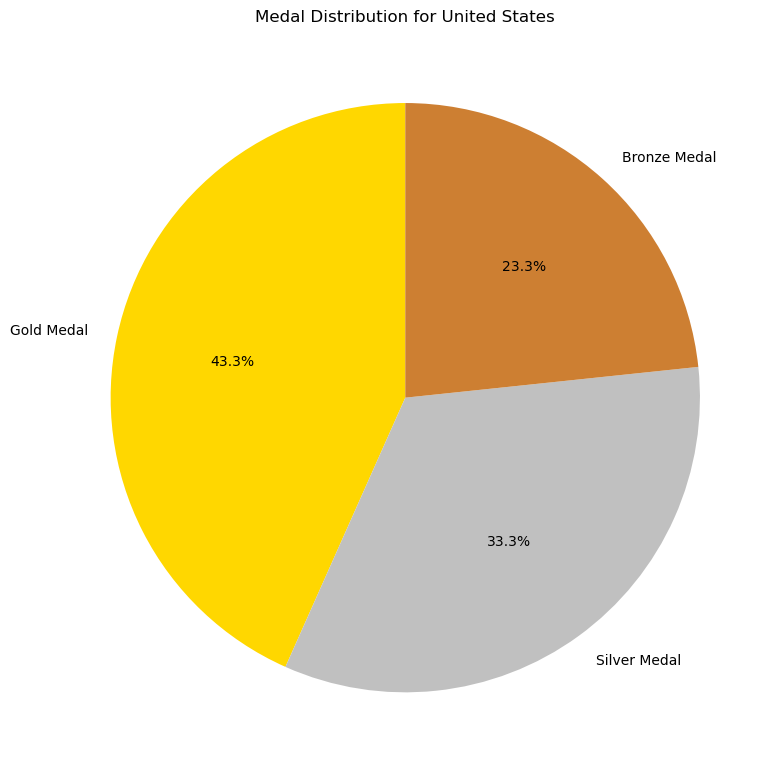

Top-performing athlete: United States
medal_type
Gold Medal      13
Silver Medal    10
Bronze Medal     7
Name: count, dtype: int64


In [102]:
#How many medals did the top-performing athlete win, and how were these medals distributed among gold, silver, and bronze?

# Group by name and count medals
athlete_medal_counts = df.groupby('name')['medal_type'].count().reset_index()

# Find the top-performing athlete
top_athlete = athlete_medal_counts.loc[athlete_medal_counts['medal_type'].idxmax()]

# Filter the data for the top-performing athlete
top_athlete_data = df[df['name'] == top_athlete['name']]

# Count the distribution of medals for the top athlete
top_athlete_medal_distribution = top_athlete_data['medal_type'].value_counts()

# Create a pie chart for the medal distribution
plt.figure(figsize=(8, 8))
top_athlete_medal_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'silver', '#cd7f32'])
plt.title(f"Medal Distribution for {top_athlete['name']}")
plt.ylabel('')
plt.tight_layout()
plt.show()

print(f"Top-performing athlete: {top_athlete['name']}")
print(top_athlete_medal_distribution)

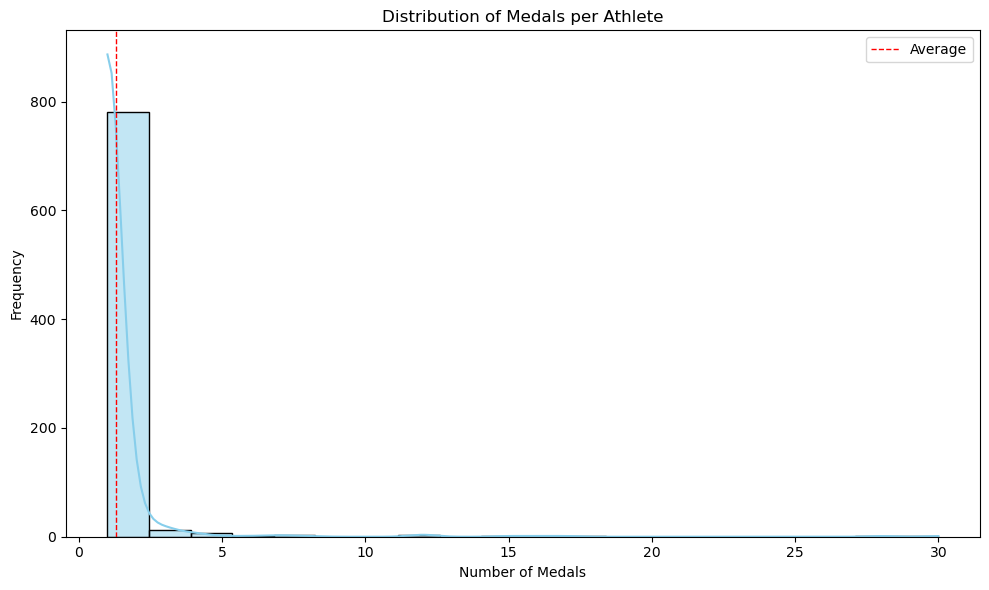

Average number of medals per athlete: 1.288888888888889


In [104]:
#What is the average number of medals won by athletes in the most recent Olympics?

# Group by athlete name and count medals
athlete_medal_counts = df.groupby('name')['medal_type'].count().reset_index()

# Calculate the average number of medals per athlete
average_medals = athlete_medal_counts['medal_type'].mean()

# Create a histogram to visualize the distribution of medals per athlete
plt.figure(figsize=(10, 6))
sns.histplot(athlete_medal_counts['medal_type'], bins=20, kde=True, color='skyblue')
plt.axvline(average_medals, color='red', linestyle='dashed', linewidth=1, label='Average')
plt.title('Distribution of Medals per Athlete')
plt.xlabel('Number of Medals')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

print('Average number of medals per athlete:', average_medals)

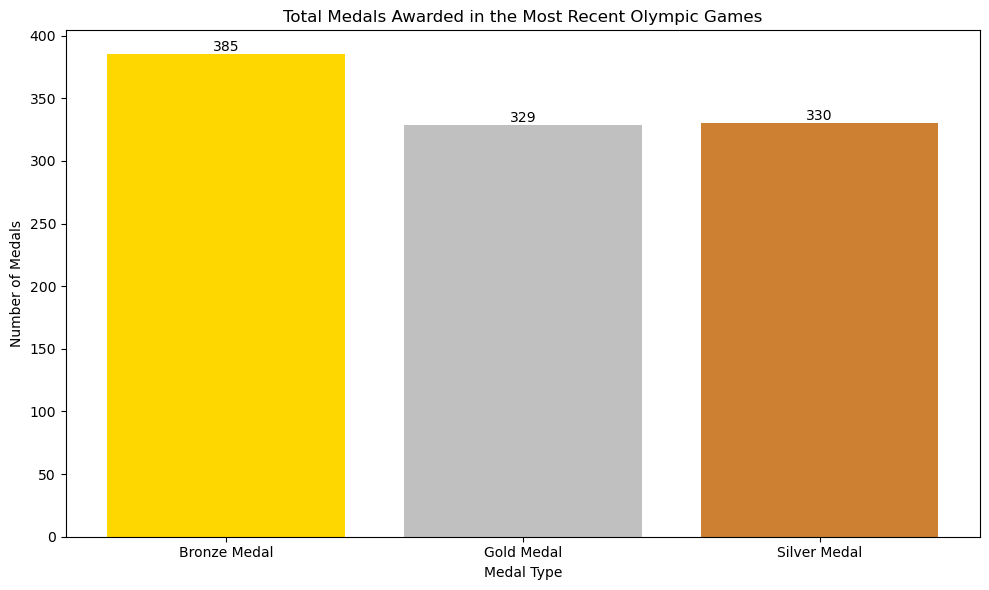

Total number of medals awarded: 1044


In [106]:
#What is the total number of medals awarded in the most recent Olympic Games?

# Count the total number of medals for each type
medal_counts = df['medal_type'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['gold', 'silver', '#cd7f32']
bars = plt.bar(medal_counts.index, medal_counts.values, color=colors)
plt.title('Total Medals Awarded in the Most Recent Olympic Games')
plt.xlabel('Medal Type')
plt.ylabel('Number of Medals')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

total_medals = medal_counts.sum()
print(f"Total number of medals awarded: {total_medals}")

In [108]:
import pandas as pd




# Display initial data
print("Initial Data:")
print(df)

# Standardize gender values ('F' -> 'Female', 'M' -> 'Male')
df['gender'] = df['gender'].replace({
    'W': 'W',
    'M': 'M',
    'X': 'M',
    'W': 'W'
})

# Remove rows where Gender is not 'Male' or 'Female'
df = df[df['gender'].isin(['M', 'W'])]

# Display cleaned data
print("\nCleaned Data (Only M and W):")
print(df)
# 1. Handle Missing Values
df.fillna(0, inplace=True)  # Replace missing values with 0 (can also use other methods)


print("\nCleaned Data:")
print(df)

Initial Data:
        medal_type  medal_code  medal_date                       name gender  \
0       Gold Medal         1.0  2024-07-27            Remco EVENEPOEL      M   
1     Silver Medal         2.0  2024-07-27              Filippo GANNA      M   
2     Bronze Medal         3.0  2024-07-27              Wout van AERT      M   
3       Gold Medal         1.0  2024-07-27                Grace BROWN      W   
4     Silver Medal         2.0  2024-07-27             Anna HENDERSON      W   
...            ...         ...         ...                        ...    ...   
1039  Silver Medal         2.0  2024-08-09             KALEYN Boryana      W   
1040  Bronze Medal         3.0  2024-08-09             RAFFAELI Sofia      W   
1041    Gold Medal         1.0  2024-08-09           THIAM Nafissatou      W   
1042  Silver Medal         2.0  2024-08-09  JOHNSON-THOMPSON Katarina      W   
1043  Bronze Medal         3.0  2024-08-09                 VIDTS Noor      W   

               discipline

C:\Users\agaje\AppData\Local\Temp\ipykernel_2208\2437867853.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)  # Replace missing values with 0 (can also use other methods)


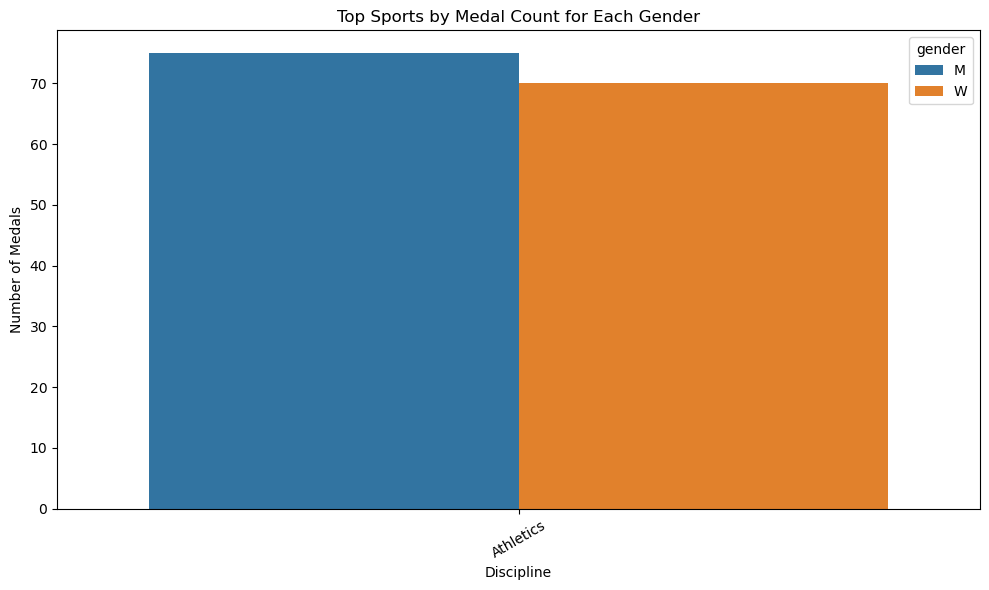

  discipline gender  medal_type
7  Athletics      M          75
8  Athletics      W          70


In [110]:
#Which sports had the highest medal counts for each gender?

# Group by discipline and gender, then count medals
medals_by_gender = df.groupby(['discipline', 'gender'])['medal_type'].count().reset_index()

# Find the top sport for each gender
max_medals_by_gender = medals_by_gender.loc[medals_by_gender.groupby('gender')['medal_type'].idxmax()]

# Create a bar plot for the top sports by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=max_medals_by_gender, x='discipline', y='medal_type', hue='gender')
plt.title('Top Sports by Medal Count for Each Gender')
plt.xlabel('Discipline')
plt.ylabel('Number of Medals')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print(max_medals_by_gender)

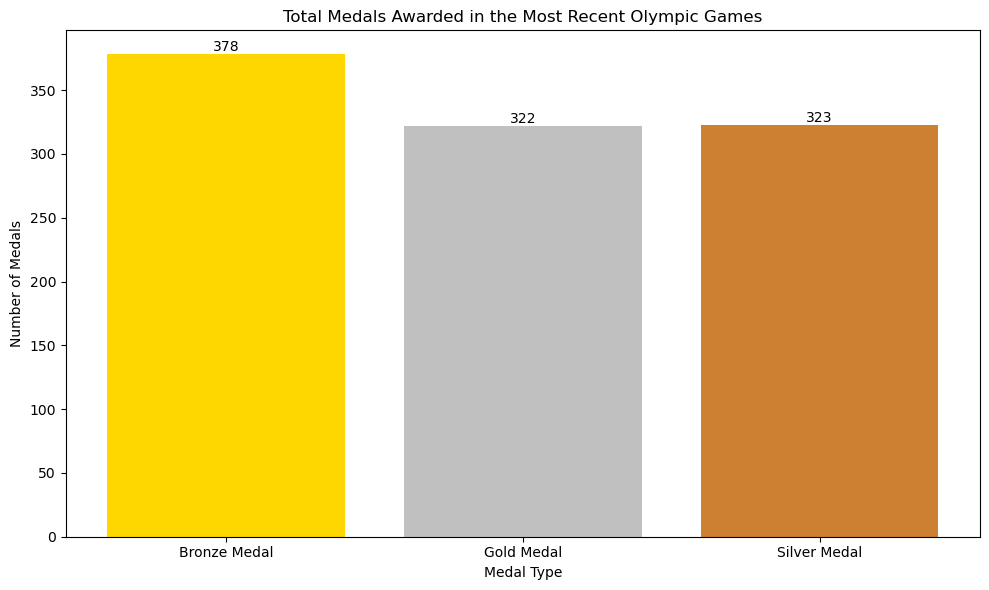

Total number of medals awarded: 1023


In [112]:
#What is the total number of medals awarded in the most recent Olympic Games?

# Count the total number of medals for each type
medal_counts = df['medal_type'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['gold', 'silver', '#cd7f32']
bars = plt.bar(medal_counts.index, medal_counts.values, color=colors)
plt.title('Total Medals Awarded in the Most Recent Olympic Games')
plt.xlabel('Medal Type')
plt.ylabel('Number of Medals')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

total_medals = medal_counts.sum()
print(f"Total number of medals awarded: {total_medals}")

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

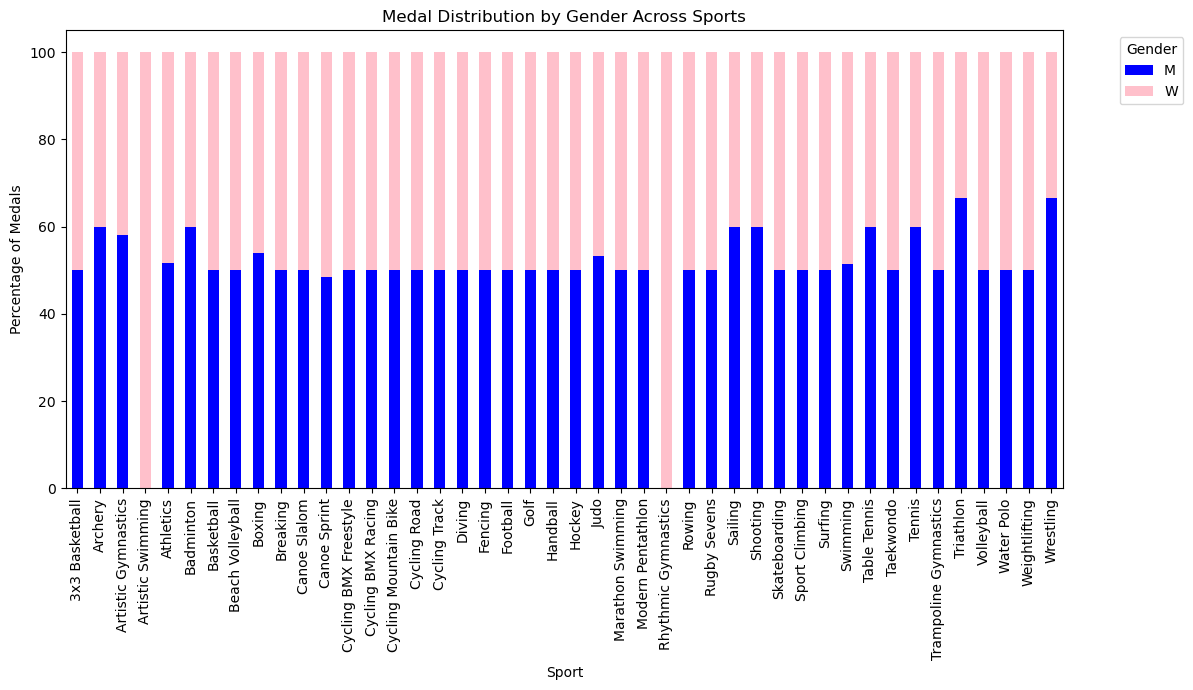

Sports dominated by one gender (more than 75% medals won by one gender):
gender                M      W
discipline                    
Artistic Swimming   NaN  100.0
Rhythmic Gymnastics NaN  100.0


In [116]:
#Are certain sports dominated by one gender in terms of medal counts?

gender_sport_distribution = df.groupby(['discipline', 'gender']).size().unstack()

# Step 2: Normalize the data to see the proportion of medals for each gender
gender_sport_distribution_percentage = gender_sport_distribution.div(gender_sport_distribution.sum(axis=1), axis=0) * 100

# Step 3: Plot the distribution of medals for each gender across sports
gender_sport_distribution_percentage.plot(kind='bar', stacked=True, figsize=(12, 7), color=['blue', 'pink'])
plt.title('Medal Distribution by Gender Across Sports')
plt.ylabel('Percentage of Medals')
plt.xlabel('Sport')
plt.xticks(rotation=90)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 4: Identifying sports dominated by one gender
dominant_sports = gender_sport_distribution_percentage[gender_sport_distribution_percentage.max(axis=1) > 75]
print("Sports dominated by one gender (more than 75% medals won by one gender):")
print(dominant_sports)

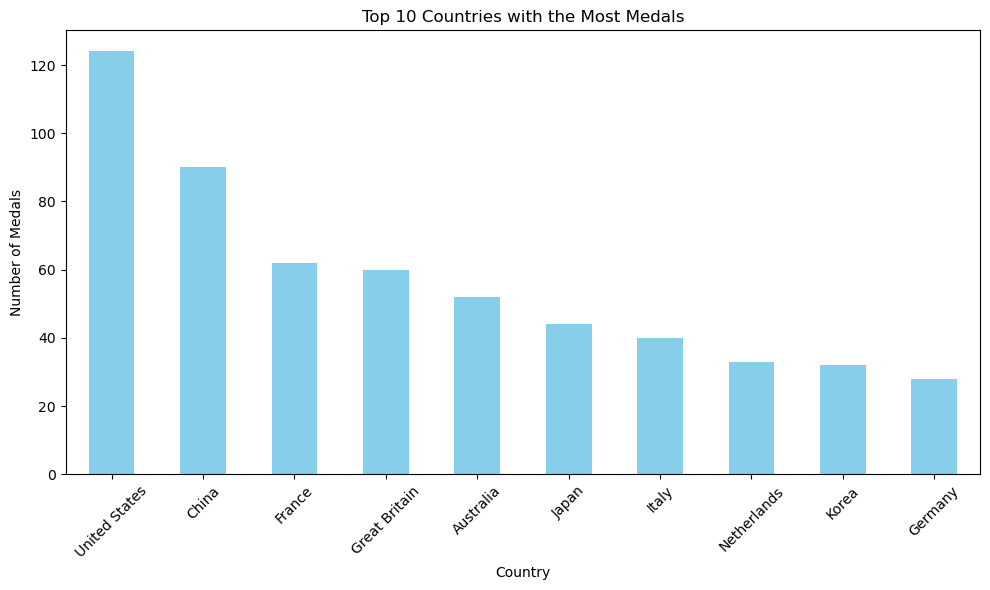

Top 10 countries with the most medals:
country
United States    124
China             90
France            62
Great Britain     60
Australia         52
Japan             44
Italy             40
Netherlands       33
Korea             32
Germany           28
dtype: int64


In [118]:
#Which countries have won the most medals?

country_medal_counts = df.groupby('country').size().sort_values(ascending=False)

# Step 2: Plot the top 10 countries with the most medals
top_countries = country_medal_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Medals')
plt.ylabel('Number of Medals')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the top 10 countries with the most medals
print("Top 10 countries with the most medals:")
print(top_countries)

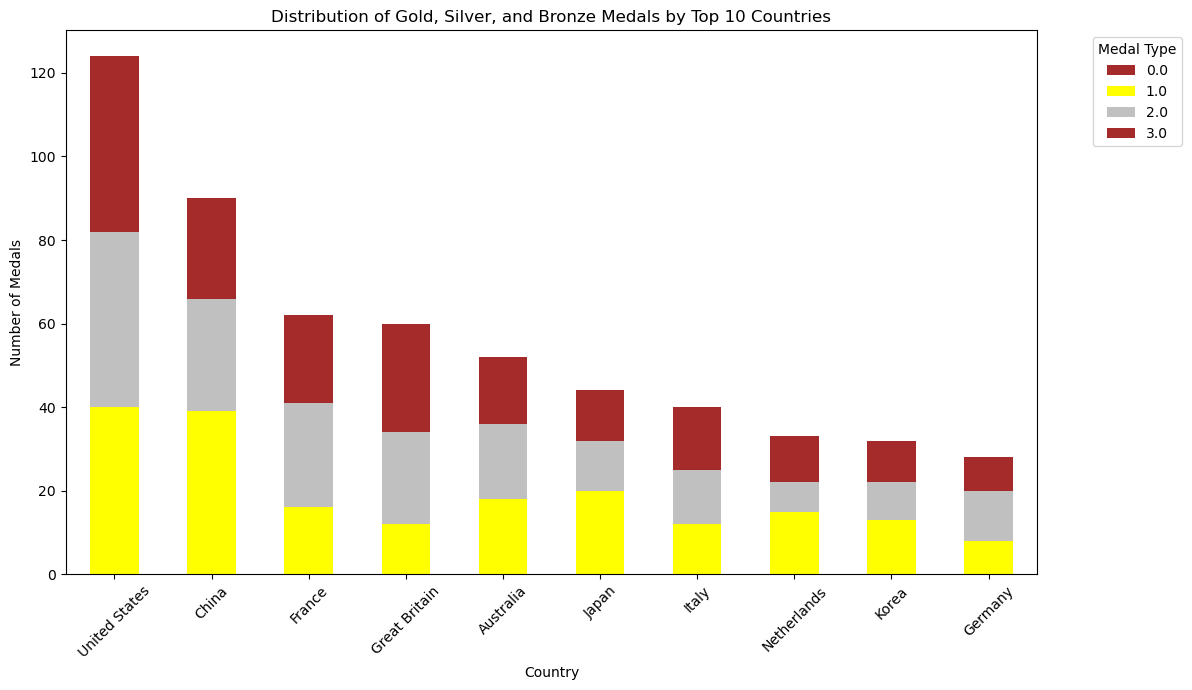

Medal distribution (raw counts) for top 10 countries:
medal_code     0.0  1.0  2.0  3.0
country                          
United States    0   40   42   42
China            0   39   27   24
France           0   16   25   21
Great Britain    0   12   22   26
Australia        0   18   18   16
Japan            0   20   12   12
Italy            0   12   13   15
Netherlands      0   15    7   11
Korea            0   13    9   10
Germany          0    8   12    8


In [120]:
#How does the distribution of gold, silver, and bronze medals vary across top 10 countries?

# Step 1: Group by country and medal type (gold, silver, bronze) and count the medals
medal_distribution = df.groupby(['country', 'medal_code']).size().unstack(fill_value=0)

# Step 2: Normalize the data to see the percentage of each medal type for each country
medal_distribution_percentage = medal_distribution.div(medal_distribution.sum(axis=1), axis=0) * 100

# Step 3: Plot the top 10 countries with the most medals, showing distribution of gold, silver, and bronze
top_countries = medal_distribution.sum(axis=1).sort_values(ascending=False).head(10).index
medal_distribution.loc[top_countries].plot(kind='bar', stacked=True, figsize=(12, 7), color=['brown', 'yellow', 'silver'])

# Step 4: Customize the plot
plt.title('Distribution of Gold, Silver, and Bronze Medals by Top 10 Countries')
plt.ylabel('Number of Medals')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the medal distribution for the top 10 countries
print("Medal distribution (raw counts) for top 10 countries:")
print(medal_distribution.loc[top_countries])

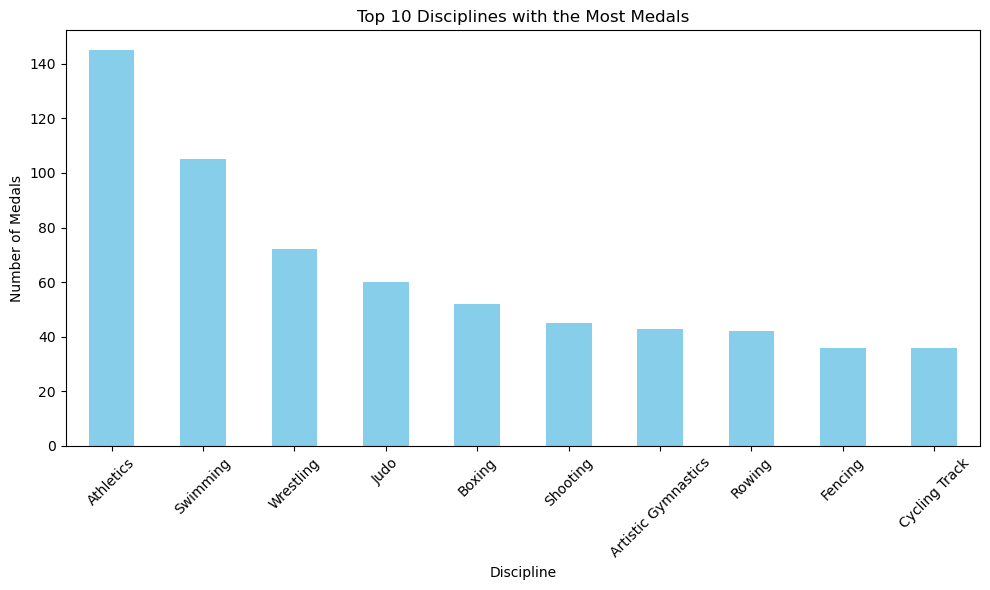

Top 10 disciplines with the most medals:
discipline
Athletics              145
Swimming               105
Wrestling               72
Judo                    60
Boxing                  52
Shooting                45
Artistic Gymnastics     43
Rowing                  42
Fencing                 36
Cycling Track           36
dtype: int64


In [122]:
#Which top 10 disciplines have the highest medal counts?

# Step 1: Group by discipline and count the total number of medals
discipline_medal_counts = df.groupby('discipline').size().sort_values(ascending=False)

# Step 2: Plot the top 10 disciplines with the most medals
top_disciplines = discipline_medal_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_disciplines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Disciplines with the Most Medals')
plt.ylabel('Number of Medals')
plt.xlabel('Discipline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the top 10 disciplines with the most medals
print("Top 10 disciplines with the most medals:")
print(top_disciplines)

<Figure size 1000x600 with 0 Axes>

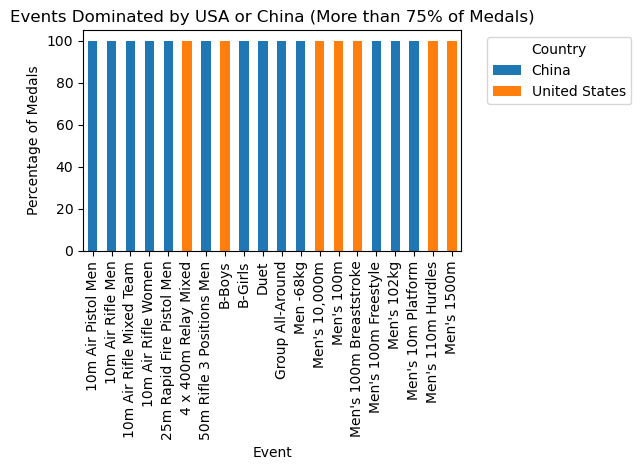

Events dominated by USA or China (more than 75% of medals):
country                    China  United States
event                                          
10m Air Pistol Men         100.0            0.0
10m Air Rifle Men          100.0            0.0
10m Air Rifle Mixed Team   100.0            0.0
10m Air Rifle Women        100.0            0.0
25m Rapid Fire Pistol Men  100.0            0.0
4 x 400m Relay Mixed         0.0          100.0
50m Rifle 3 Positions Men  100.0            0.0
B-Boys                       0.0          100.0
B-Girls                    100.0            0.0
Duet                       100.0            0.0
Group All-Around           100.0            0.0
Men -68kg                  100.0            0.0
Men's 10,000m                0.0          100.0
Men's 100m                   0.0          100.0
Men's 100m Breaststroke      0.0          100.0
Men's 100m Freestyle       100.0            0.0
Men's 102kg                100.0            0.0
Men's 10m Platform         1

In [124]:
#In which events do specific countries, such as the USA or China, dominate?  

# Step 1: Filter the dataset for USA and China only
df_usa_china = df[df['country'].isin(['United States', 'China'])]

# Step 2: Group by event and country, and count the number of medals for each country in each event
event_country_medal_counts = df_usa_china.groupby(['event', 'country']).size().unstack(fill_value=0)

# Step 3: Calculate the percentage of medals won by USA and China in each event
event_country_medal_percentage = event_country_medal_counts.div(event_country_medal_counts.sum(axis=1), axis=0) * 100

# Step 4: Identify events where either the USA or China has won more than 50% of the medals
dominant_events = event_country_medal_percentage[(event_country_medal_percentage['United States'] > 75) | (event_country_medal_percentage['China'] > 75)]

# Step 5: Plot the top 10 events where either USA or China dominates
plt.figure(figsize=(10, 6))
dominant_events.head(20).plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Events Dominated by USA or China (More than 75% of Medals)')
plt.ylabel('Percentage of Medals')
plt.xlabel('Event')
plt.xticks(rotation=90)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the dominant events where USA or China has won more than 50% of the medals
print("Events dominated by USA or China (more than 75% of medals):")
print(dominant_events.head(20))

In [ ]:
MEDALLISTS

In [131]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path ="C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"  # Path to your uploaded file
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
df.head()


,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN


In [133]:
numerical=df.select_dtypes(include=['int64','float64']).columns #df.select used to select 
print("numerical features are",numerical.tolist())
categor=df.select_dtypes(include=['category','object','bool']).columns  
print("categorical features are",categor.tolist())

numerical features are ['medal_code', 'code_athlete']
categorical features are ['medal_date', 'medal_type', 'name', 'gender', 'country_code', 'country', 'country_long', 'nationality', 'team', 'team_gender', 'discipline', 'event', 'event_type', 'url_event', 'birth_date', 'code_team']


In [135]:
import pandas as pd                                                         #2

# Load the CSV file (replace 'medallists.csv' with your file path)
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv")

# Drop any rows with missing country or gender data
cleaned_data = medal_data.dropna(subset=['country', 'gender'])

# Group the data by country and gender to count the number of medals won by each
country_gender_representation = cleaned_data.groupby(['country', 'gender']).size().unstack().fillna(0)

# Rename the columns for better clarity
country_gender_representation.columns = ['Female Medals', 'Male Medals']

# Sort the result by the total number of medals (both male and female)
country_gender_representation['Total Medals'] = country_gender_representation['Female Medals'] + country_gender_representation['Male Medals']
sorted_representation = country_gender_representation.sort_values(by='Total Medals', ascending=False)

# Display the top countries by male and female medalists
sorted_representation.head()


,Female Medals,Male Medals,Total Medals
country,,,
United States,187.0,143.0,330.0
France,61.0,125.0,186.0
China,112.0,56.0,168.0
Great Britain,81.0,80.0,161.0
Australia,76.0,47.0,123.0


In [137]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Find rows where 'gender' column has missing values
missing_gender_rows = df[df['gender'].isna()]

# Display the rows with missing 'gender' values
print(missing_gender_rows)

      medal_date    medal_type  medal_code name gender country_code country  \
1128  2024-08-02  Bronze Medal         3.0  NaN    NaN          NaN     NaN   
1191  2024-08-03    Gold Medal         1.0  NaN    NaN          NaN     NaN   
1904  2024-08-10  Bronze Medal         3.0  NaN    NaN          NaN     NaN   

     country_long nationality           team team_gender  discipline  \
1128          NaN         NaN         France           O  Equestrian   
1191          NaN         NaN    Netherlands           X   Athletics   
1904          NaN         NaN  Great Britain           M   Athletics   

                     event event_type  \
1128          Jumping Team       TEAM   
1191  4 x 400m Relay Mixed       TEAM   
1904  Men's 4 x 400m Relay       TEAM   

                                              url_event birth_date  \
1128  /en/paris-2024/results/equestrian/jumping-team...        NaN   
1191  /en/paris-2024/results/athletics/4-x-400m-rela...        NaN   
1904  /en/paris-202

C:\Users\agaje\AppData\Local\Temp\ipykernel_2208\764579963.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_data_clean['birth_date'] = pd.to_datetime(medal_data_clean['birth_date'])
C:\Users\agaje\AppData\Local\Temp\ipykernel_2208\764579963.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_data_clean['age'] = 2024 - medal_data_clean['birth_date'].dt.year


             mean  median       std
gender                             
Female  26.482788    26.0  4.860160
Male    27.286087    27.0  5.015457


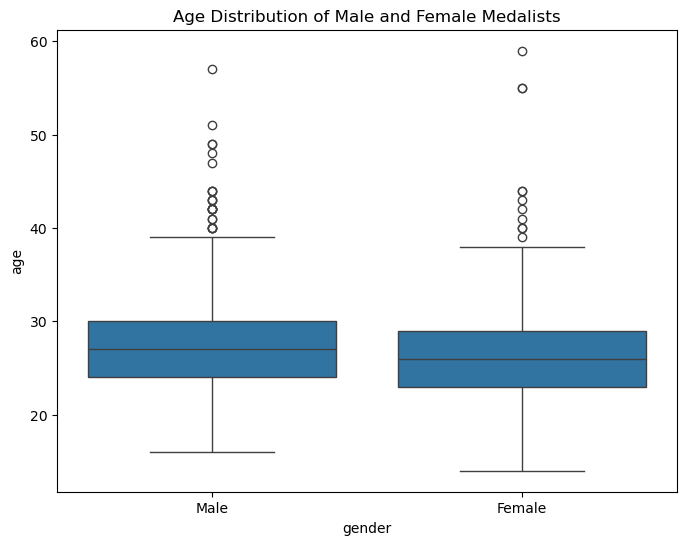

In [139]:
import pandas as pd                                                         #6
import numpy as np

# Load the CSV file (replace 'medallists.csv' with your file path)
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv")

# Drop rows with missing birth_date or gender information
medal_data_clean = medal_data.dropna(subset=['birth_date', 'gender'])

# Convert birth_date to datetime format
medal_data_clean['birth_date'] = pd.to_datetime(medal_data_clean['birth_date'])

# Extract year of birth and calculate age (assuming the event year is 2024)
medal_data_clean['age'] = 2024 - medal_data_clean['birth_date'].dt.year

# Group by gender to calculate average and median age
age_by_gender = medal_data_clean.groupby('gender')['age'].agg(['mean', 'median', 'std'])

# Display the age statistics for male and female medalists
print(age_by_gender)

# Optional: Visualize the age distribution using a boxplot (if you have matplotlib installed)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=medal_data_clean)
plt.title('Age Distribution of Male and Female Medalists')
plt.show()


        Bronze Medals  Gold Medals  Silver Medals
gender                                           
Female            402          378            382
Male              403          373            374


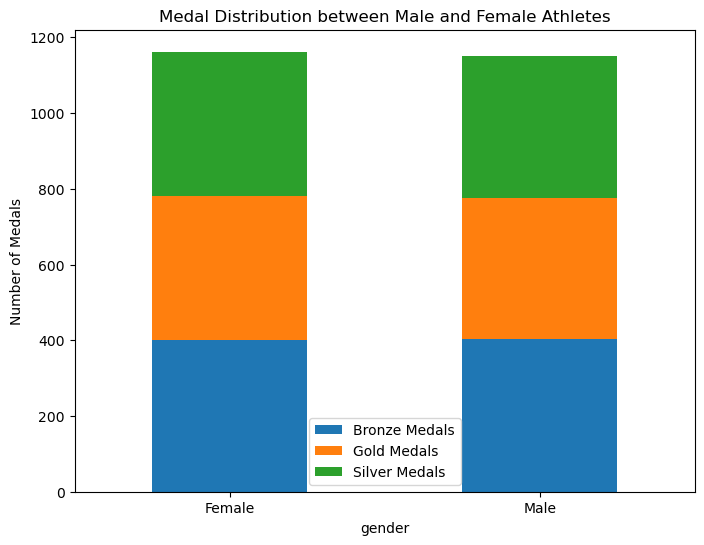

In [141]:
import pandas as pd                                                     # 1

# Load the CSV file (replace 'medallists.csv' with your file path)
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv")

# Drop rows with missing gender or medal_type information
cleaned_data = medal_data.dropna(subset=['gender', 'medal_type'])

# Group the data by gender and medal type to count the number of each medal won by male and female athletes
medal_distribution = cleaned_data.groupby(['gender', 'medal_type']).size().unstack().fillna(0)

# Rename the columns for better clarity
medal_distribution.columns = ['Bronze Medals', 'Gold Medals', 'Silver Medals']

# Display the medal distribution
print(medal_distribution)

# Optional: Visualize the medal distribution using a bar plot (if you have matplotlib installed)
import matplotlib.pyplot as plt

medal_distribution.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Medal Distribution between Male and Female Athletes')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.show()


In [143]:
import pandas as pd                                     #4

# Load the CSV file (replace 'medallists.csv' with your file path)
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv")

# Drop rows with missing gender or event information
cleaned_data = medal_data.dropna(subset=['gender', 'event'])

# Group the data by event and gender, then count unique events for each gender
event_count_by_gender = cleaned_data.groupby('gender')['event'].nunique()

# Display the number of unique events for male and female athletes
print(event_count_by_gender)

# Calculate the difference between male and female events
difference = event_count_by_gender['Male'] - event_count_by_gender['Female']
print(f"There are {difference} more events where male athletes won medals compared to female athletes." if difference > 0 else f"There are {abs(difference)} more events where female athletes won medals compared to male athletes.")


gender
Female    150
Male      155
Name: event, dtype: int64
There are 5 more events where male athletes won medals compared to female athletes.


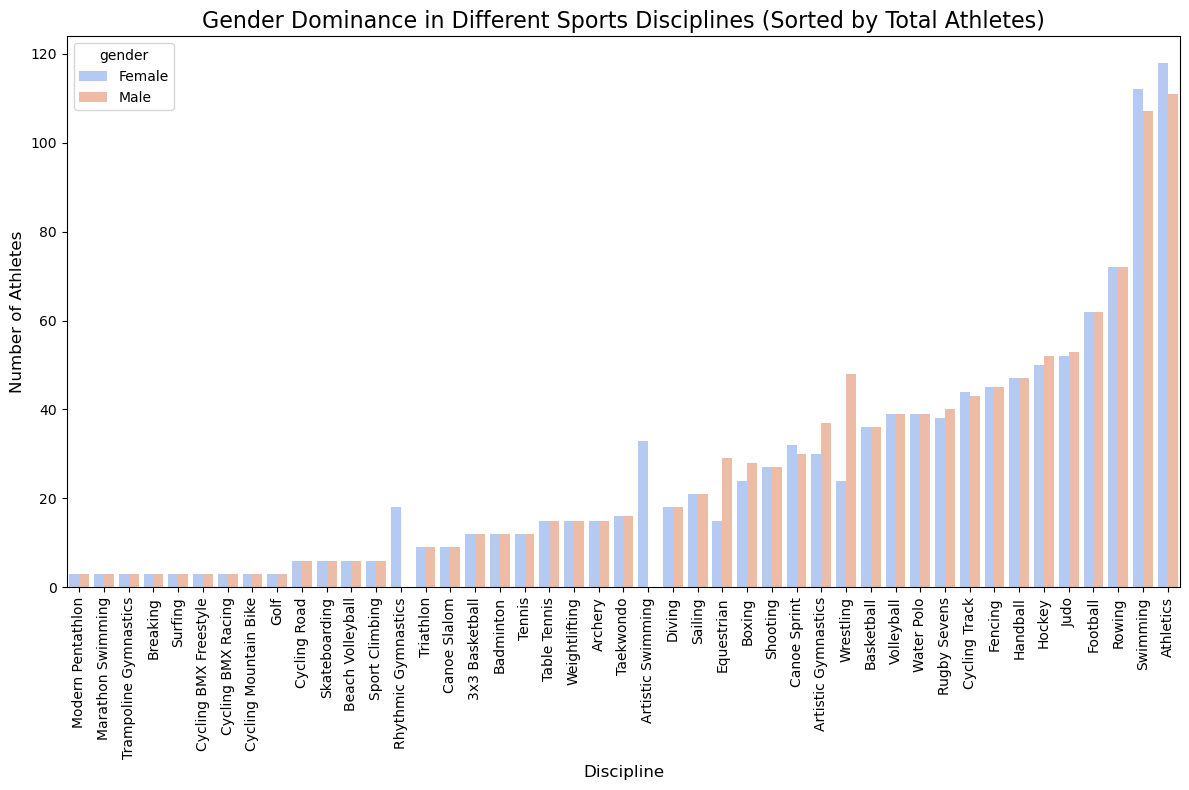

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected file path with double backslashes (use your file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Create a pivot table to analyze gender distribution by sport
gender_sport_distribution = df.pivot_table(index='discipline', columns='gender', aggfunc='size', fill_value=0)

# Add a column for total athletes (to sort by)
gender_sport_distribution['Total'] = gender_sport_distribution.sum(axis=1)

# Sort the data by total number of athletes in ascending order
gender_sport_distribution = gender_sport_distribution.sort_values('Total', ascending=True)

# Reset the index for easier plotting
gender_sport_distribution = gender_sport_distribution.reset_index()

# Melt the DataFrame to long format for seaborn plotting
gender_sport_distribution_melted = gender_sport_distribution.melt(id_vars=['discipline', 'Total'], var_name='gender', value_name='Count')

# Plot the data using seaborn, sorted by the total number of athletes
plt.figure(figsize=(12, 8))
sns.barplot(x='discipline', y='Count', hue='gender', data=gender_sport_distribution_melted, palette='coolwarm', order=gender_sport_distribution['discipline'])

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.title('Gender Dominance in Different Sports Disciplines (Sorted by Total Athletes)', fontsize=16)
plt.xlabel('Discipline', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [153]:
import pandas as pd

# Corrected file path (replace with your actual file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Drop rows with missing country or medal type information
df_cleaned = df.dropna(subset=['country', 'medal_type'])

# Group by country and medal type to count the number of medals of each type
medals_by_country = df_cleaned.groupby(['country', 'medal_type']).size().unstack().fillna(0)

# Add a total medals column for each country
medals_by_country['Total Medals'] = medals_by_country.sum(axis=1)

# Calculate the ratio of gold medals to total medals for each country
medals_by_country['Gold to Total Ratio'] = medals_by_country['Gold Medal'] / medals_by_country['Total Medals']

# Display the result, sorted by the ratio of gold to total medals
medals_by_country_sorted = medals_by_country.sort_values(by='Gold to Total Ratio', ascending=False)

# Display the countries with their gold to total medal ratios
print(medals_by_country_sorted[['Gold Medal', 'Total Medals', 'Gold to Total Ratio']])


medal_type  Gold Medal  Total Medals  Gold to Total Ratio
country                                                  
Dominica           1.0           1.0             1.000000
Pakistan           1.0           1.0             1.000000
Norway            18.0          23.0             0.782609
Algeria            2.0           3.0             0.666667
Slovenia           2.0           3.0             0.666667
...                ...           ...                  ...
Kyrgyzstan         0.0           6.0             0.000000
Lithuania          0.0           7.0             0.000000
Malaysia           0.0           3.0             0.000000
Mexico             0.0           8.0             0.000000
Zambia             0.0           1.0             0.000000

[92 rows x 3 columns]


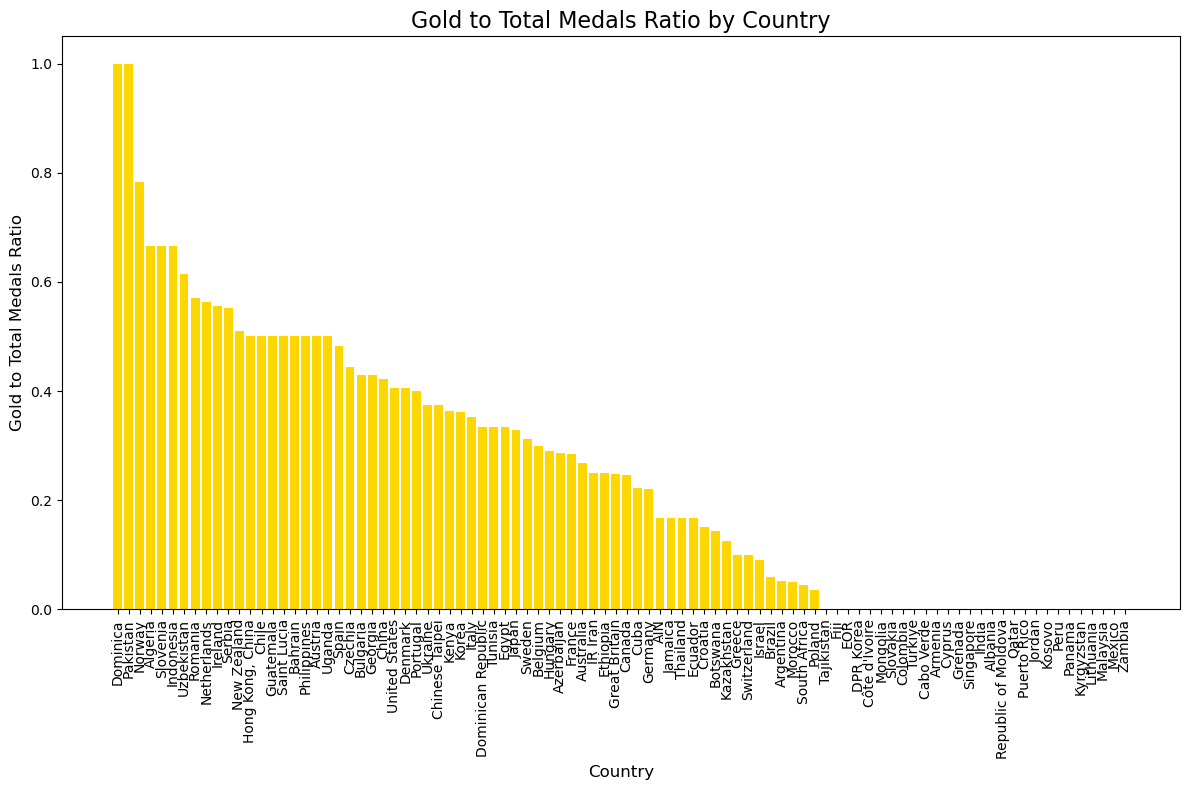

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected file path (replace with your actual file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Drop rows with missing country or medal type information
df_cleaned = df.dropna(subset=['country', 'medal_type'])

# Group by country and medal type to count the number of medals of each type
medals_by_country = df_cleaned.groupby(['country', 'medal_type']).size().unstack().fillna(0)

# Add a total medals column for each country
medals_by_country['Total Medals'] = medals_by_country.sum(axis=1)

# Calculate the ratio of gold medals to total medals for each country
medals_by_country['Gold to Total Ratio'] = medals_by_country['Gold Medal'] / medals_by_country['Total Medals']

# Sort by the ratio of gold to total medals
medals_by_country_sorted = medals_by_country.sort_values(by='Gold to Total Ratio', ascending=False)

# Plot the ratio of gold to total medals for each country
plt.figure(figsize=(12, 8))
plt.bar(medals_by_country_sorted.index, medals_by_country_sorted['Gold to Total Ratio'], color='gold')

# Add labels and title
plt.title('Gold to Total Medals Ratio by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Gold to Total Medals Ratio', fontsize=12)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [157]:
import pandas as pd

# Corrected file path (replace with your actual file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Drop rows with missing country, discipline, or medal type information
df_cleaned = df.dropna(subset=['country', 'discipline', 'medal_type'])

# Group by country and sport (discipline), and count the number of medals won in each sport
country_sport_medals = df_cleaned.groupby(['country', 'discipline']).size().reset_index(name='Medal Count')

# Sort by country and medal count to find countries that consistently win medals in the same sport
consistent_countries = country_sport_medals[country_sport_medals['Medal Count'] > 1].sort_values(by='Medal Count', ascending=False)

# Display the top countries that consistently win medals in certain sports
print(consistent_countries)


           country discipline  Medal Count
476  United States   Swimming           70
454  United States  Athletics           58
31       Australia   Swimming           51
208  Great Britain  Athletics           39
100          China   Swimming           36
..             ...        ...          ...
186        Georgia  Wrestling            2
181         France  Triathlon            2
180         France  Taekwondo            2
177         France    Surfing            2
488     Uzbekistan  Wrestling            2

[285 rows x 3 columns]


C:\Users\agaje\AppData\Local\Temp\ipykernel_2208\2740981557.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medal Count', y='discipline', data=sport_medal_distribution_sorted.head(10), palette='coolwarm')


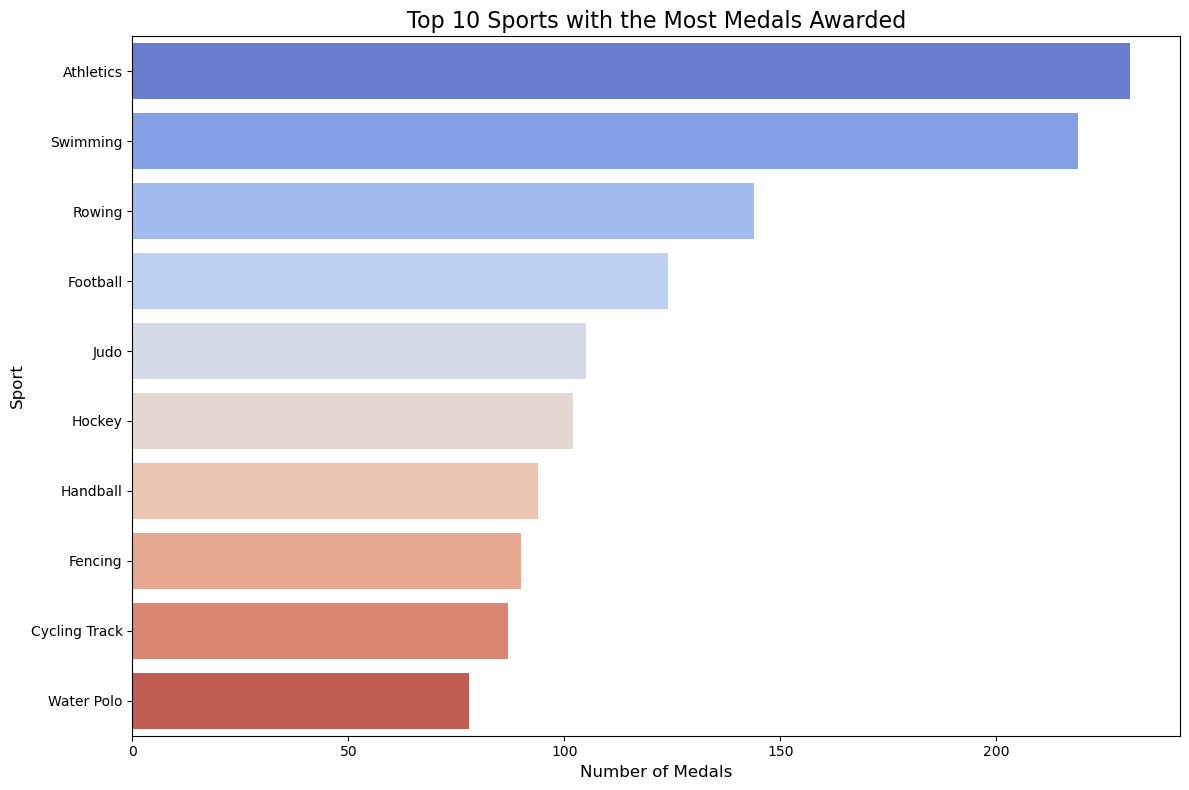

In [159]:
# Group by discipline (sport) and count the number of medals
sport_medal_distribution = df.groupby('discipline').size().reset_index(name='Medal Count')

# Sort by number of medals
sport_medal_distribution_sorted = sport_medal_distribution.sort_values(by='Medal Count', ascending=False)

# Plot the sports with the most medals
plt.figure(figsize=(12, 8))
sns.barplot(x='Medal Count', y='discipline', data=sport_medal_distribution_sorted.head(10), palette='coolwarm')

# Add labels and title
plt.title('Top 10 Sports with the Most Medals Awarded', fontsize=16)
plt.xlabel('Number of Medals', fontsize=12)
plt.ylabel('Sport', fontsize=12)
plt.tight_layout()
plt.show()



In [ ]:
CONCATENATED 

In [170]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path ="C:\\Users\\agaje\\Desktop\\EDA\\concatenated_df.csv" # Path to your uploaded file
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Hosted
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Hungary,Men,100M Freestyle,Gold,False
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Austria,Men,100M Freestyle,Silver,False
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Greece,Men,100M Freestyle For Sailors,Bronze,True
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Greece,Men,100M Freestyle For Sailors,Gold,True
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Greece,Men,100M Freestyle For Sailors,Silver,True


In [172]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Find rows where 'gender' column has missing values
missing_gender_rows = df[df['Gender'].isna()]

# Display the rows with missing 'gender' values
print(missing_gender_rows)

Empty DataFrame
Columns: [Year, City, Sport, Discipline, Athlete, Country, Gender, Event, Medal, Hosted]
Index: []


In [174]:
numerical=df.select_dtypes(include=['int64','float64']).columns #df.select used to select 
print("numerical features are",numerical.tolist())
categor=df.select_dtypes(include=['category','object','bool']).columns  
print("categorical features are",categor.tolist())

numerical features are ['Year']
categorical features are ['City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender', 'Event', 'Medal', 'Hosted']


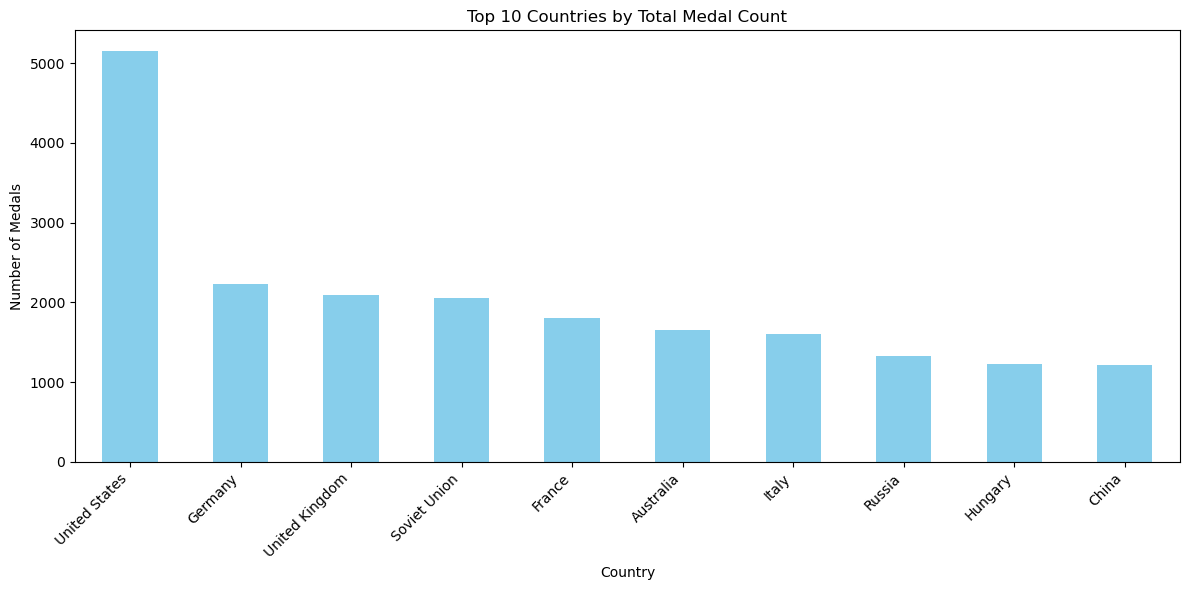

Country
United States     5152
Germany           2236
United Kingdom    2094
Soviet Union      2049
France            1806
Australia         1649
Italy             1608
Russia            1323
Hungary           1233
China             1211
Name: count, dtype: int64


In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

medal_counts = df['Country'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
medal_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(medal_counts)

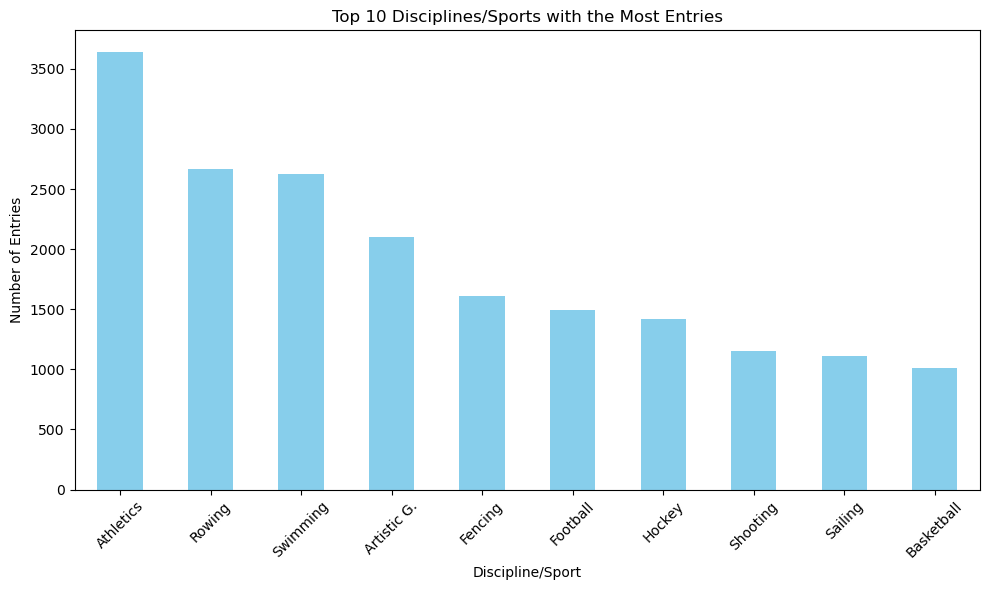

Top 10 disciplines/sports with the most entries:
Discipline
Athletics      3638
Rowing         2667
Swimming       2628
Artistic G.    2103
Fencing        1613
Football       1497
Hockey         1422
Shooting       1150
Sailing        1109
Basketball     1012
dtype: int64


In [178]:
import pandas as pd
import matplotlib.pyplot as plt



# Step 1: Group by discipline/sport and count the entries
discipline_counts = df.groupby('Discipline').size().sort_values(ascending=False)

# Step 2: Plot the top 10 disciplines/sports with the most entries
top_disciplines = discipline_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_disciplines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Disciplines/Sports with the Most Entries')
plt.ylabel('Number of Entries')
plt.xlabel('Discipline/Sport')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the top 10 disciplines with the most entries
print("Top 10 disciplines/sports with the most entries:")
print(top_disciplines)

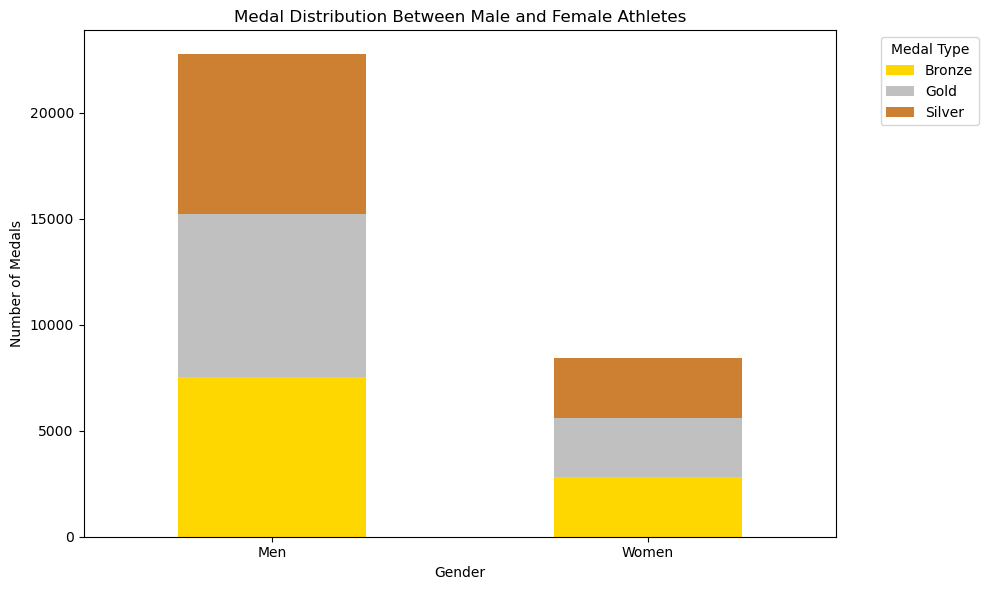

Medal distribution between male and female athletes:
Medal   Bronze  Gold  Silver
Gender                      
Men       7539  7698    7509
Women     2830  2788    2801


In [180]:
medal_gender_distribution = pd.crosstab(df['Gender'], df['Medal'])

# Step 2: Plot the distribution of medals between male and female athletes
medal_gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FFD700', '#C0C0C0', '#CD7F32'])

# Customize the plot
plt.title('Medal Distribution Between Male and Female Athletes')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the contingency table for detailed numbers
print("Medal distribution between male and female athletes:")
print(medal_gender_distribution)

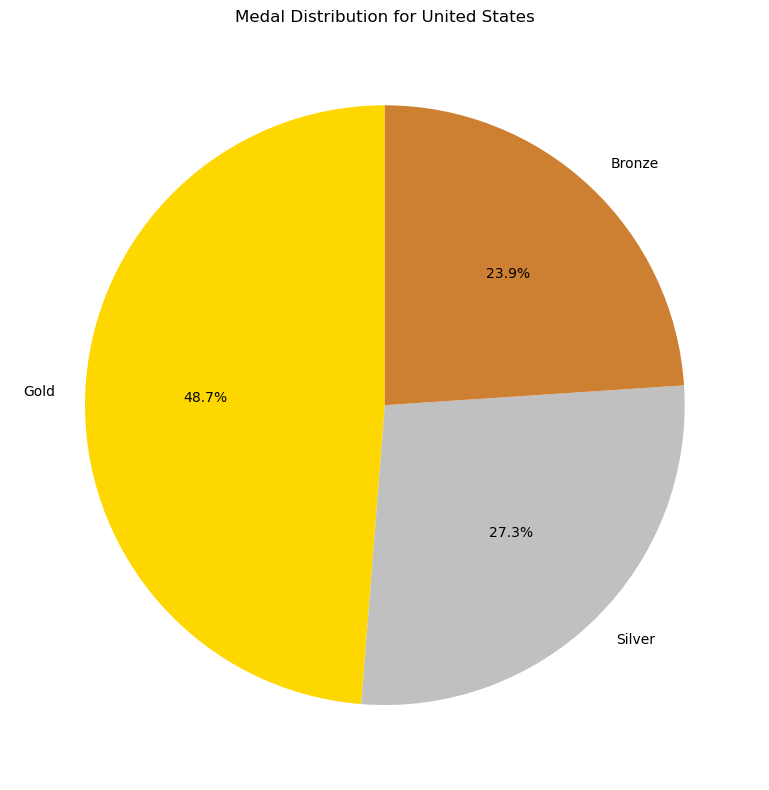

Top-performing athlete: United States
Medal
Gold      2235
Silver    1252
Bronze    1098
Name: count, dtype: int64


In [182]:
country_medal_counts = df.groupby('Country')['Medal'].count().reset_index()

# Find the top-performing country
top_country = country_medal_counts.loc[country_medal_counts['Medal'].idxmax()]

# Filter the data for the top-performing country
top_country_data = df[df['Country'] == top_country['Country']]

# Count the distribution of medals for the top country
top_country_medal_distribution = top_country_data['Medal'].value_counts()

# Create a pie chart for the medal distribution
plt.figure(figsize=(8, 8))
top_country_medal_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'silver', '#cd7f32'])
plt.title(f"Medal Distribution for {top_country['Country']}")
plt.ylabel('')
plt.tight_layout()
plt.show()

print(f"Top-performing athlete: {top_country['Country']}")
print(top_country_medal_distribution)

Overall standard deviation of medal counts across disciplines: 725.49


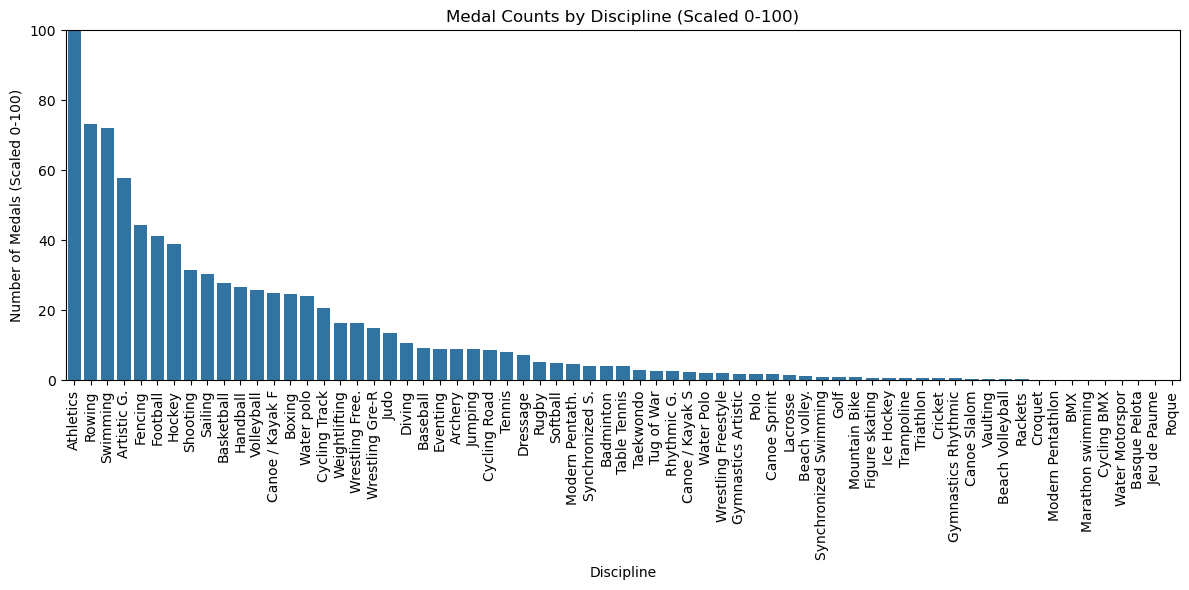


Top 5 disciplines by medal count (actual values):
Discipline
Athletics      3638
Rowing         2667
Swimming       2628
Artistic G.    2103
Fencing        1613
Name: count, dtype: int64

Bottom 5 disciplines by medal count (actual values):
Discipline
Cycling BMX        6
Water Motorspor    5
Basque Pelota      4
Jeu de Paume       3
Roque              3
Name: count, dtype: int64


In [184]:
# Step 1: Calculate overall standard deviation of medal counts across disciplines
discipline_std = df.groupby('Discipline')['Medal'].count().std()
print(f"Overall standard deviation of medal counts across disciplines: {discipline_std:.2f}")

# Step 2: Calculate medal counts for each discipline
discipline_counts = df['Discipline'].value_counts()

# Step 3: Normalize the medal counts to a scale of 0-100
scaled_discipline_counts = (discipline_counts / discipline_counts.max()) * 100

# Step 4: Create a bar plot for the normalized medal counts by discipline
plt.figure(figsize=(12, 6))
sns.barplot(x=scaled_discipline_counts.index, y=scaled_discipline_counts.values)
plt.title('Medal Counts by Discipline (Scaled 0-100)')
plt.xlabel('Discipline')
plt.ylabel('Number of Medals (Scaled 0-100)')
plt.xticks(rotation=90)
plt.ylim(0, 100)  # Ensure y-axis is scaled from 0 to 100
plt.tight_layout()
plt.show()

# Step 5: Display top 5 and bottom 5 disciplines by medal count (non-scaled)
print("\nTop 5 disciplines by medal count (actual values):")
print(discipline_counts.head())

print("\nBottom 5 disciplines by medal count (actual values):")
print(discipline_counts.tail())

In [186]:
# Drop rows with missing athlete, discipline, or medal type information
df_cleaned_athletes = df.dropna(subset=['Athlete', 'Discipline', 'Medal'])

# Group by athlete and sport (discipline), and count the number of medals won in each sport
athlete_sport_medals = df_cleaned_athletes.groupby(['Athlete', 'Discipline']).size().reset_index(name='Medal Count')

# Sort by athlete and medal count to find athletes that consistently win medals in the same sport
consistent_athletes = athlete_sport_medals[athlete_sport_medals['Medal Count'] > 1].sort_values(by='Medal Count', ascending=False)

# Display the top athletes that consistently win medals in certain sports
print(consistent_athletes)


                     Athlete   Discipline  Medal Count
15872        PHELPS, Michael     Swimming           22
11334       LATYNINA, Larisa  Artistic G.           18
514       ANDRIANOV, Nikolay  Artistic G.           15
18305        SHAKHLIN, Boris  Artistic G.           13
15049           ONO, Takashi  Artistic G.           13
...                      ...          ...          ...
12277     LUNG, Noemi Ildiko     Swimming            2
12298            LUSIC, Deni   Water polo            2
4262      DE LA FUENTE, Juan      Sailing            2
12300        LUSK, Stanislav       Rowing            2
1      AALTONEN, Arvo Ossian     Swimming            2

[5141 rows x 3 columns]


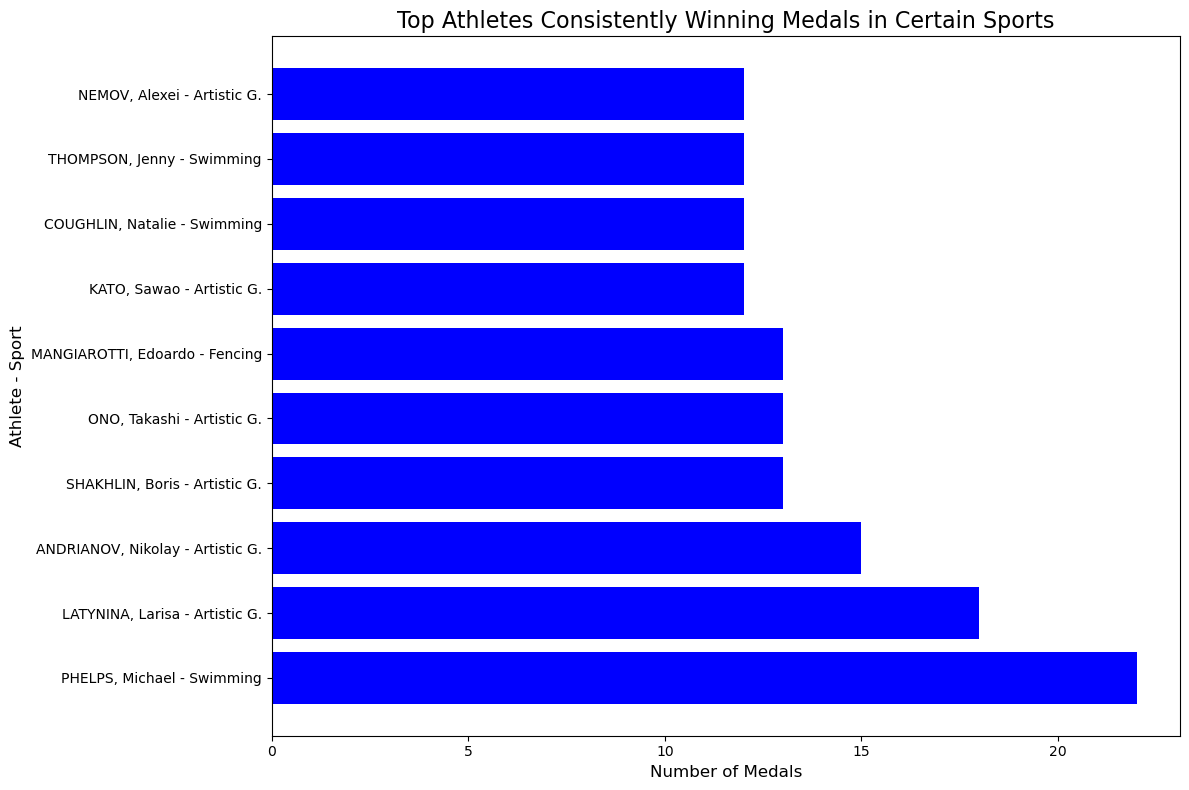

In [188]:
# Plot the consistent athletes that win medals in certain sports
plt.figure(figsize=(12, 8))
consistent_athletes_top = consistent_athletes.head(10)  # Top 10 athletes

plt.barh(consistent_athletes_top['Athlete'] + ' - ' + consistent_athletes_top['Discipline'],
         consistent_athletes_top['Medal Count'], color='blue')

plt.title('Top Athletes Consistently Winning Medals in Certain Sports', fontsize=16)
plt.xlabel('Number of Medals', fontsize=12)
plt.ylabel('Athlete - Sport', fontsize=12)
plt.tight_layout()
plt.show()

In [190]:
import pandas as pd

# Corrected file path (replace with your actual file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\concatenated_df.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Drop rows with missing country, discipline, or medal type information
df_cleaned = df.dropna(subset=['Country', 'Discipline', 'Medal'])

# Group by country and sport (discipline), and count the number of medals won in each sport
country_sport_medals = df_cleaned.groupby(['Country', 'Discipline']).size().reset_index(name='Medal Count')

# Sort by country and medal count to find countries that consistently win medals in the same sport
consistent_countries = country_sport_medals[country_sport_medals['Medal Count'] > 1].sort_values(by='Medal Count', ascending=False)

# Display the top countries that consistently win medals in certain sports
print(consistent_countries)

            Country       Discipline  Medal Count
1228  United States        Athletics          994
1263  United States         Swimming          895
1258  United States           Rowing          364
57        Australia         Swimming          354
632           Italy          Fencing          344
...             ...              ...          ...
600           India  Wrestling Free.            2
595           India           Boxing            2
593           India        Athletics            2
590         Iceland        Athletics            2
0               AFG        Taekwondo            2

[1084 rows x 3 columns]


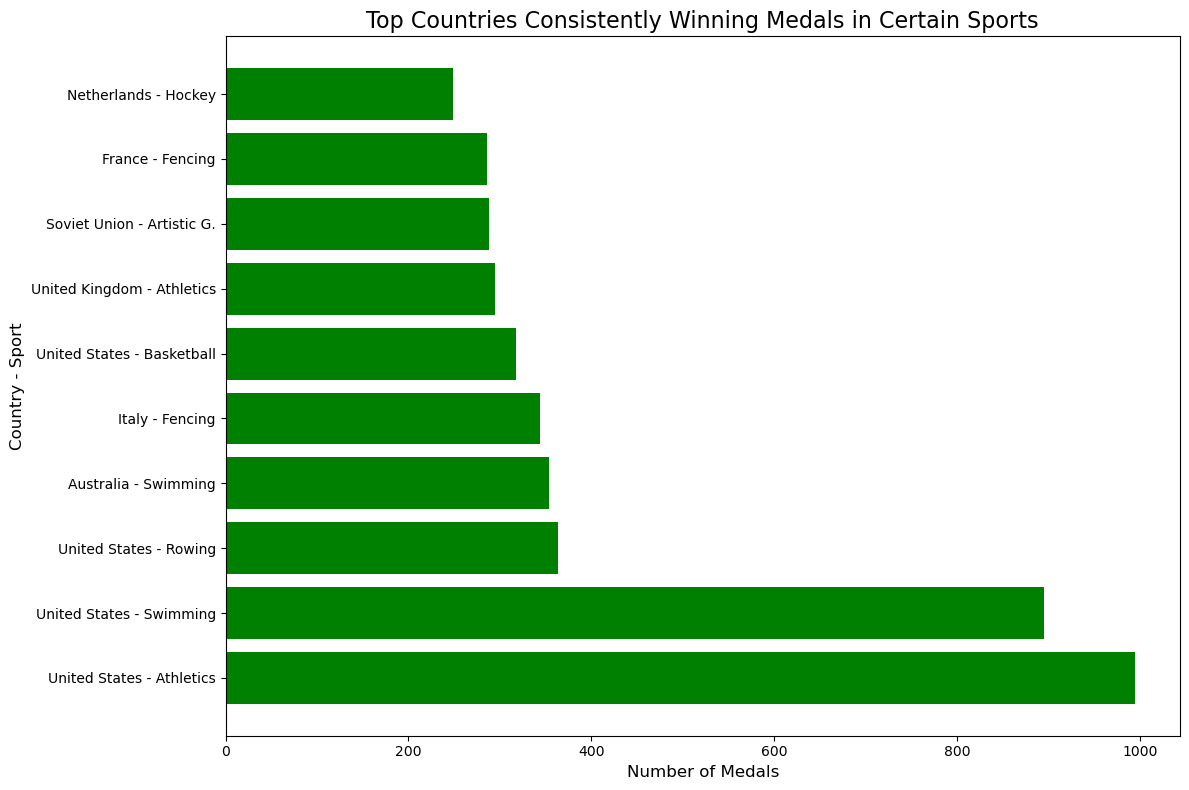

In [192]:
# Plot the consistent countries that win medals in certain sports
import matplotlib.pyplot as plt

# Plot for countries
plt.figure(figsize=(12, 8))
consistent_countries_top = consistent_countries.head(10)  # Top 10 countries

plt.barh(consistent_countries_top['Country'] + ' - ' + consistent_countries_top['Discipline'],
         consistent_countries_top['Medal Count'], color='green')

plt.title('Top Countries Consistently Winning Medals in Certain Sports', fontsize=16)
plt.xlabel('Number of Medals', fontsize=12)
plt.ylabel('Country - Sport', fontsize=12)
plt.tight_layout()
plt.show()


In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming medal_data is already loaded and cleaned as in your previous code
# If not, uncomment and modify the following line:
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\concatenated_df.csv")

# Create a dictionary of host countries and years
host_countries = {
    1896: 'Greece', 1900: 'France', 1904: 'USA', 1908: 'UK', 1912: 'Sweden',
    1920: 'Belgium', 1924: 'France', 1928: 'Netherlands', 1932: 'USA', 1936: 'Germany',
    1948: 'UK', 1952: 'Finland', 1956: 'Australia', 1960: 'Italy', 1964: 'Japan',
    1968: 'Mexico', 1972: 'West Germany', 1976: 'Canada', 1980: 'Soviet Union',
    1984: 'USA', 1988: 'South Korea', 1992: 'Spain', 1996: 'USA', 2000: 'Australia',
    2004: 'Greece', 2008: 'China', 2012: 'UK', 2016: 'Brazil', 2020: 'Japan'
}

# Function to check if a country was the host in a given year
def is_host(row):
    return host_countries.get(row['Year']) == row['Country']

# Add a column to indicate if the country was the host
medal_data['Is_Host'] = medal_data.apply(is_host, axis=1)

# Group by Country, Year, and Is_Host to count medals
medal_counts = medal_data.groupby(['Country', 'Year', 'Is_Host']).size().reset_index(name='Medal_Count')

# Calculate average medals for each country when hosting and not hosting
host_performance = medal_counts.groupby(['Country', 'Is_Host'])['Medal_Count'].mean().unstack()
host_performance.columns = ['Avg_Medals_Non_Host', 'Avg_Medals_Host']
host_performance = host_performance.dropna()  # Remove countries that never hosted

# Calculate the difference in performance
host_performance['Difference'] = host_performance['Avg_Medals_Host'] - host_performance['Avg_Medals_Non_Host']
host_performance = host_performance.sort_values('Difference', ascending=False)

# Print the results
print(host_performance)

# Visualization


# Statistical test
from scipy import stats

host_medals = host_performance['Avg_Medals_Host']
non_host_medals = host_performance['Avg_Medals_Non_Host']

t_statistic, p_value = stats.ttest_rel(host_medals, non_host_medals)

print(f"\nt-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("There is statistically significant evidence of a home advantage.")
else:
    print("There is no statistically significant evidence of a home advantage.")

              Avg_Medals_Non_Host  Avg_Medals_Host  Difference
Country                                                       
Brazil                  23.944444            485.0  461.055556
Soviet Union           200.875000            442.0  241.125000
Belgium                 13.791667            188.0  174.208333
Sweden                  41.400000            173.0  131.600000
Germany                101.300000            210.0  108.700000
France                  59.960000            153.5   93.540000
Australia               56.200000            122.0   65.800000
China                  128.375000            184.0   55.625000
South Korea             44.333333             77.0   32.666667
Greece                   9.294118             41.5   32.205882
Spain                   38.277778             66.0   27.722222
Italy                   60.800000             88.0   27.200000
Netherlands             43.125000             65.0   21.875000
Finland                 19.583333             40.0   20

NameError: name 'max_val' is not defined

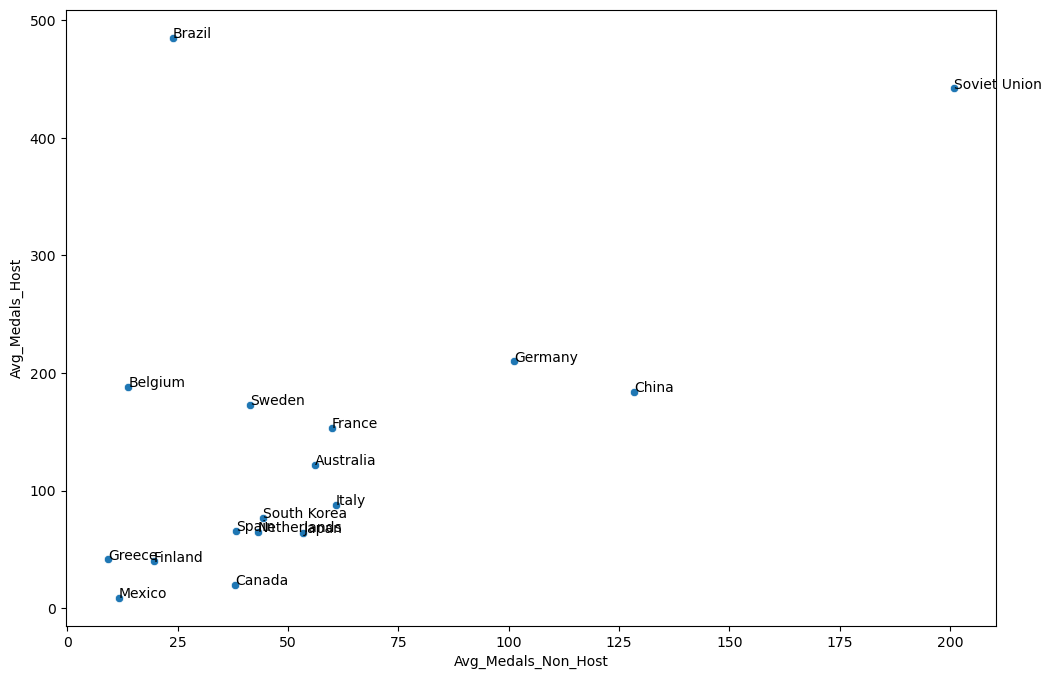

In [198]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=host_performance.reset_index(), x='Avg_Medals_Non_Host', y='Avg_Medals_Host')

# Add labels for each point
for idx, row in host_performance.iterrows():
    plt.annotate(idx, (row['Avg_Medals_Non_Host'], row['Avg_Medals_Host']))

# Add a diagonal line for reference


#max_val = max(host_performance['Avg_Medals_Non_Host'].max(), host_performance['Avg_Medals_Host'].max())
plt.plot([0, max_val], [0, max_val], 'r--')

plt.title('Average Medal Count: Host vs Non-Host Years')
plt.xlabel('Average Medals in Non-Host Years')
plt.ylabel('Average Medals in Host Years')
plt.tight_layout()
plt.show()

In [200]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\concatenated_df.csv")

# Filter out rows where the medal is NaN (no medal awarded)
medals_df = df[df['Medal'].notna()]

# Count the medals by country
medal_counts = medals_df.groupby(['Country', 'Medal']).size().unstack(fill_value=0)

# Rename the columns for better readability
medal_counts.columns = ['Bronze', 'Gold', 'Silver']

# Calculate total medals for each country
medal_counts['Total'] = medal_counts.sum(axis=1)

# Sort the countries by total medals and get the top 20
top_20_countries = medal_counts.sort_values(by='Total', ascending=False).head(20)

# Display the result
print(top_20_countries)

                            Bronze  Gold  Silver  Total
Country                                                
United States                 1098  2235    1252   4585
Soviet Union                   584   838     627   2049
Germany                        655   595     545   1795
United Kingdom                 553   546     621   1720
France                         497   408     491   1396
Italy                          404   476     416   1296
Australia                      477   332     409   1218
Hungary                        351   412     316   1079
Sweden                         328   349     367   1044
Russia                         337   270     284    891
Netherlands                    339   233     279    851
German Democratic Republic     225   329     271    825
China                          221   290     296    807
Japan                          303   213     272    788
Canada                         262   155     232    649
Romania                        288   157     195

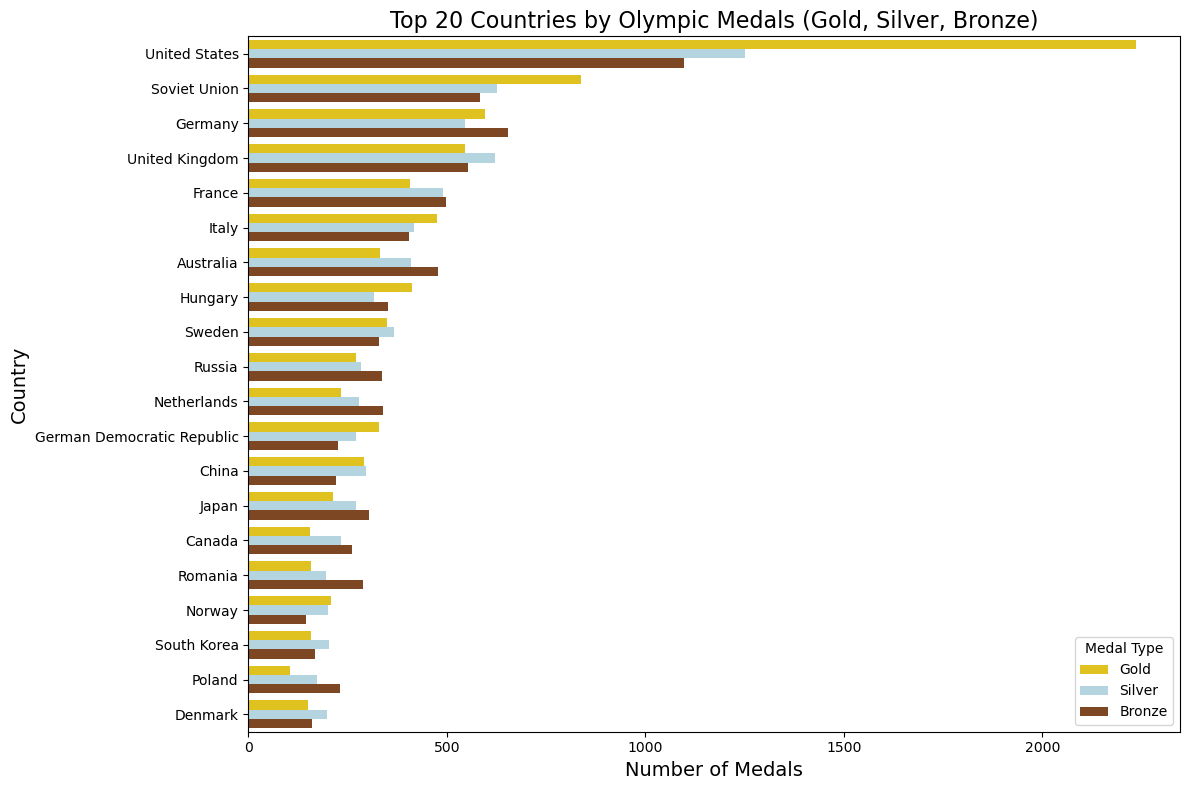

In [202]:

# Reset index for plotting
top_20_countries.reset_index(inplace=True)

# Set the figure size
plt.figure(figsize=(12, 8))

# Melt the DataFrame for better plotting
top_20_melted = top_20_countries.melt(id_vars='Country', value_vars=['Gold', 'Silver', 'Bronze'], 
                                        var_name='Medal Type', value_name='Count')

# Create a bar plot with specific colors for each medal type
sns.barplot(data=top_20_melted, x='Count', y='Country', hue='Medal Type',
            hue_order=['Gold', 'Silver', 'Bronze'],
            palette={'Gold': '#FFD700', 'Silver': '#ADD8E6', 'Bronze': '#8B4513'})

# Add titles and labels
plt.title('Top 20 Countries by Olympic Medals (Gold, Silver, Bronze)', fontsize=16)
plt.xlabel('Number of Medals', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.legend(title='Medal Type')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\agaje\AppData\Local\Temp\ipykernel_2208\4053466877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medal Count', y='Discipline', data=sport_medal_distribution_sorted.head(10), palette='coolwarm')


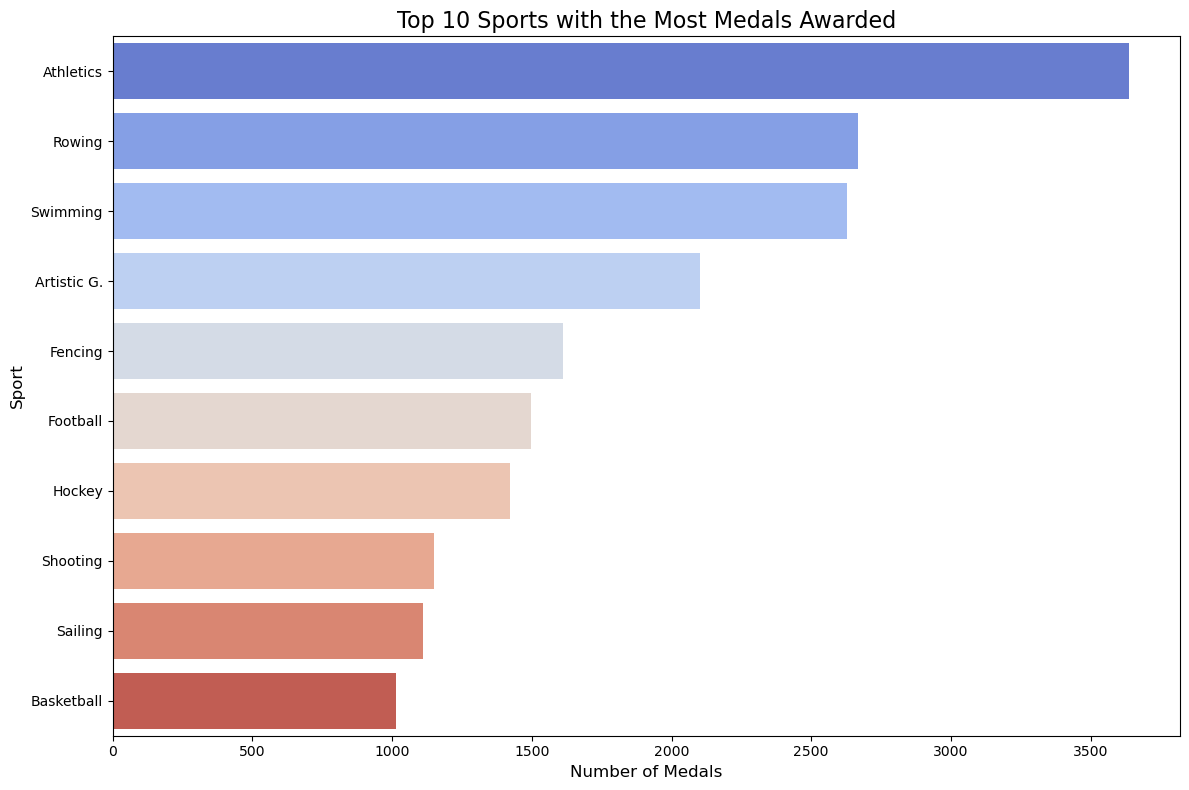

In [204]:
# Group by discipline (sport) and count the number of medals
sport_medal_distribution = df.groupby('Discipline').size().reset_index(name='Medal Count')

# Sort by number of medals
sport_medal_distribution_sorted = sport_medal_distribution.sort_values(by='Medal Count', ascending=False)

# Plot the sports with the most medals
plt.figure(figsize=(12, 8))
sns.barplot(x='Medal Count', y='Discipline', data=sport_medal_distribution_sorted.head(10), palette='coolwarm')

# Add labels and title
plt.title('Top 10 Sports with the Most Medals Awarded', fontsize=16)
plt.xlabel('Number of Medals', fontsize=12)
plt.ylabel('Sport', fontsize=12)
plt.tight_layout()
plt.show()

